# Heart Disease Data Analysis: A Comprehensive Study

## Dimensionality Reduction, Manifold Learning, and Responsible AI

**What we'll explore:**
1. **Data Preprocessing** - Cleaning, handling missing values, outliers, and transformations
2. **Linear Dimensionality Reduction** - PCA analysis
3. **Nonlinear Dimensionality Reduction** - t-SNE and UMAP
4. **Manifold Learning** - Isomap and LLE
5. **Interactive Visualizations** - Comprehensive visual analysis
6. **Data Ethics & Responsible AI** - Privacy, bias, and GDPR considerations
7. **Data Storytelling** - Narrative insights and conclusions

---
# Part 1: Setup and Data Loading
---

In [63]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Scikit-learn - Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
import umap

# Interactive Visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Warnings
import warnings
warnings.filterwarnings('ignore')

# Plot settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14

# Color palette for consistency
COLORS = {'disease': '#d73027', 'healthy': '#4575b4'}

print("All libraries loaded successfully!")

All libraries loaded successfully!


In [64]:
# Load the dataset
df_raw = pd.read_csv('heart.csv')

print("="*60)
print("HEART DISEASE DATASET - INITIAL OVERVIEW")
print("="*60)
print(f"\nDataset Shape: {df_raw.shape[0]} rows × {df_raw.shape[1]} columns")
print(f"\nFeatures: {list(df_raw.columns)}")
df_raw.head(10)

HEART DISEASE DATASET - INITIAL OVERVIEW

Dataset Shape: 1025 rows × 14 columns

Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
5   0     2       1  
6   3     1       0  
7   1     3       0  
8   0     3       0  
9   2     2       0

### Dataset Description

The UCI Heart Disease dataset contains medical records used to predict heart disease presence.

| Feature | Description | Type |
|---------|-------------|------|
| **age** | Age in years | Continuous |
| **sex** | Sex (1=male, 0=female) | Binary |
| **cp** | Chest pain type (0-3) | Categorical |
| **trestbps** | Resting blood pressure (mm Hg) | Continuous |
| **chol** | Serum cholesterol (mg/dl) | Continuous |
| **fbs** | Fasting blood sugar > 120 mg/dl | Binary |
| **restecg** | Resting ECG results (0-2) | Categorical |
| **thalach** | Maximum heart rate achieved | Continuous |
| **exang** | Exercise induced angina | Binary |
| **oldpeak** | ST depression induced by exercise | Continuous |
| **slope** | Slope of peak exercise ST segment | Categorical |
| **ca** | Number of major vessels (0-4) | Discrete |
| **thal** | Thalassemia type | Categorical |
| **target** | Heart disease (1=yes, 0=no) | Binary |

---
# Part 2: Data Preprocessing and Cleaning
---

## 2.1 Missing Values Analysis

In [65]:
# Check for missing values
print("MISSING VALUES ANALYSIS")
print("="*40)

missing_df = pd.DataFrame({
    'Column': df_raw.columns,
    'Missing Count': df_raw.isnull().sum().values,
    'Missing %': (df_raw.isnull().sum().values / len(df_raw) * 100).round(2)
})
print(missing_df.to_string(index=False))
print(f"\nTotal missing values: {df_raw.isnull().sum().sum()}")

MISSING VALUES ANALYSIS
  Column  Missing Count  Missing %
     age              0        0.0
     sex              0        0.0
      cp              0        0.0
trestbps              0        0.0
    chol              0        0.0
     fbs              0        0.0
 restecg              0        0.0
 thalach              0        0.0
   exang              0        0.0
 oldpeak              0        0.0
   slope              0        0.0
      ca              0        0.0
    thal              0        0.0
  target              0        0.0

Total missing values: 0


## 2.2 Duplicate Detection and Removal

In [66]:
# Check for duplicates
print("DUPLICATE ANALYSIS")
print("="*40)

n_duplicates = df_raw.duplicated().sum()
print(f"Number of duplicate rows: {n_duplicates}")
print(f"Percentage of duplicates: {100 * n_duplicates / len(df_raw):.2f}%")

# Show example duplicates
if n_duplicates > 0:
    print(f"\nExample duplicate rows:")
    dup_mask = df_raw.duplicated(keep=False)
    display(df_raw[dup_mask].head(6))

DUPLICATE ANALYSIS
Number of duplicate rows: 723
Percentage of duplicates: 70.54%

Example duplicate rows:


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
5   0     2       1

In [67]:
# Remove duplicates
df = df_raw.drop_duplicates().reset_index(drop=True)

print(f"\nDuplicates removed!")
print(f"Original size: {len(df_raw)} → Cleaned size: {len(df)}")
print(f"Rows removed: {len(df_raw) - len(df)}")


Duplicates removed!
Original size: 1025 → Cleaned size: 302
Rows removed: 723


## 2.3 Data Types and Basic Statistics

In [68]:
# Data types
print("DATA TYPES")
print("="*40)
print(df.dtypes)

print("\n" + "="*40)
print("SUMMARY STATISTICS")
print("="*40)
df.describe().round(2)

DATA TYPES
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

SUMMARY STATISTICS


age     sex      cp  trestbps    chol     fbs  restecg  thalach  \
count  302.00  302.00  302.00    302.00  302.00  302.00   302.00   302.00   
mean    54.42    0.68    0.96    131.60  246.50    0.15     0.53   149.57   
std      9.05    0.47    1.03     17.56   51.75    0.36     0.53    22.90   
min     29.00    0.00    0.00     94.00  126.00    0.00     0.00    71.00   
25%     48.00    0.00    0.00    120.00  211.00    0.00     0.00   133.25   
50%     55.50    1.00    1.00    130.00  240.50    0.00     1.00   152.50   
75%     61.00    1.00    2.00    140.00  274.75    0.00     1.00   166.00   
max     77.00    1.00    3.00    200.00  564.00    1.00     2.00   202.00   

        exang  oldpeak   slope      ca    thal  target  
count  302.00   302.00  302.00  302.00  302.00  302.00  
mean     0.33     1.04    1.40    0.72    2.31    0.54  
std      0.47     1.16    0.62    1.01    0.61    0.50  
min      0.00     0.00    0.00    0.00    0.00    0.00  
25%      0.00     0.00    1.00    0.00    2.00    0.00  
50%      0.00     0.80    1.00    0.00    2.00    1.00  
75%      1.00     1.60    2.00    1.00    3.00    1.00  
max      1.00     6.20    2.00    4.00    3.00    1.00

## 2.4 Outlier Detection and Analysis

In [69]:
# Define continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Outlier detection using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return len(outliers), lower, upper

print("OUTLIER ANALYSIS (IQR Method)")
print("="*60)
outlier_summary = []
for col in continuous_features:
    n_outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_summary.append({
        'Feature': col,
        'Outliers': n_outliers,
        'Outlier %': round(100*n_outliers/len(df), 2),
        'Lower Bound': round(lower, 2),
        'Upper Bound': round(upper, 2)
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))

OUTLIER ANALYSIS (IQR Method)
 Feature  Outliers  Outlier %  Lower Bound  Upper Bound
     age         0       0.00        28.50        80.50
trestbps         9       2.98        90.00       170.00
    chol         5       1.66       115.38       370.38
 thalach         1       0.33        84.12       215.12
 oldpeak         5       1.66        -2.40         4.00


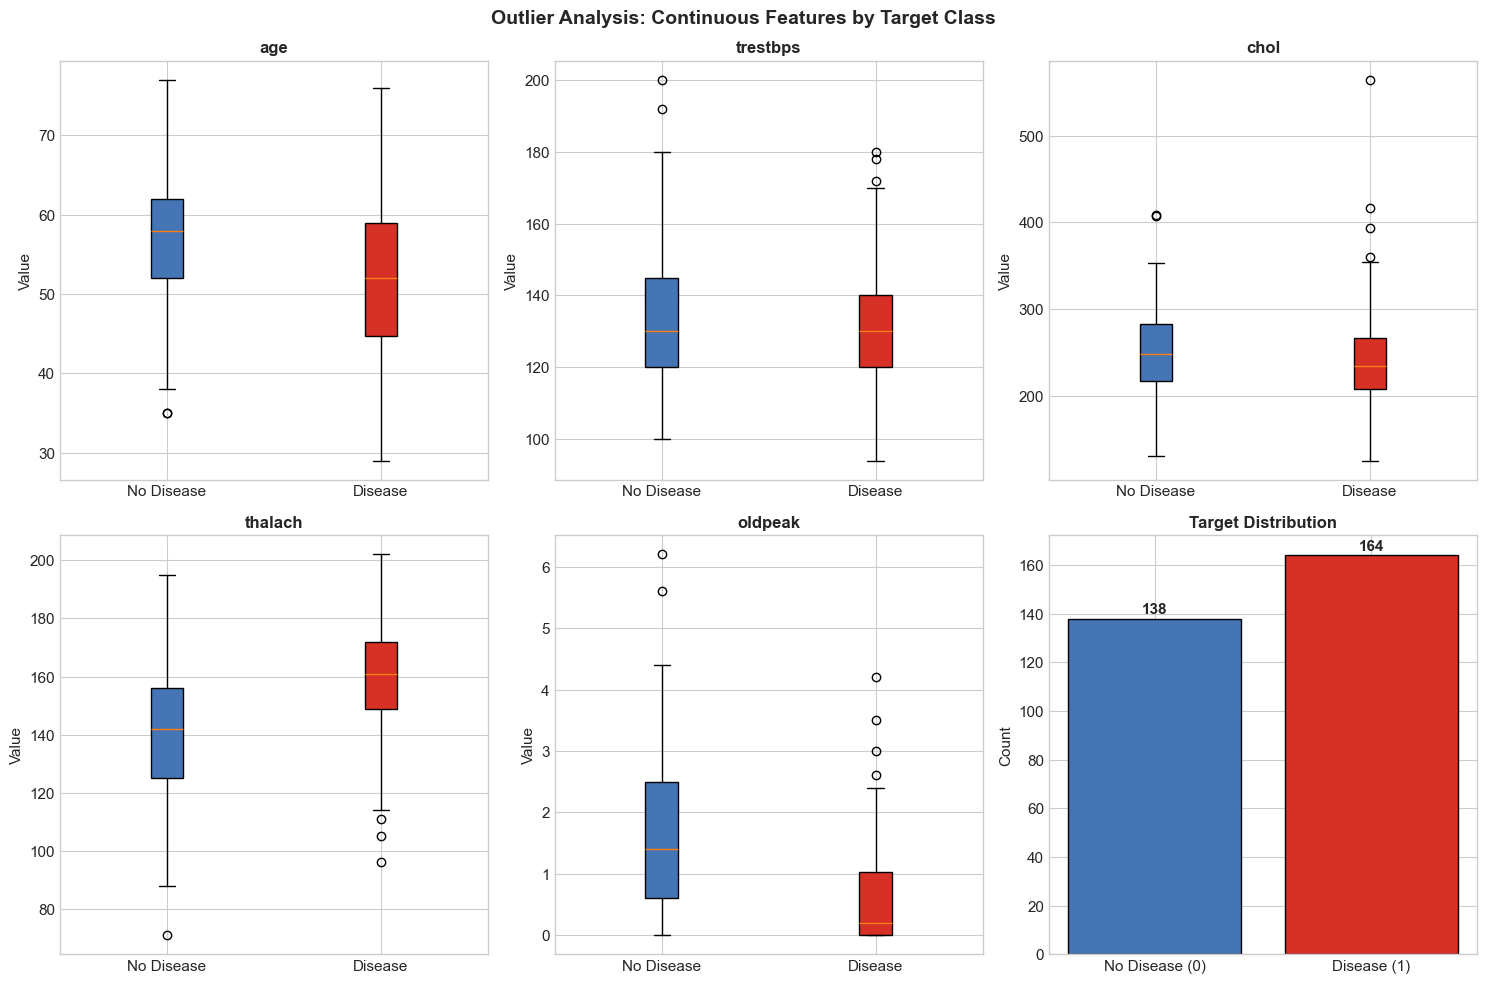

In [70]:
# Visualize outliers with boxplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(continuous_features):
    # Boxplot by target class
    bp = axes[idx].boxplot([df[df['target']==0][col], df[df['target']==1][col]], 
                           labels=['No Disease', 'Disease'],
                           patch_artist=True)
    bp['boxes'][0].set_facecolor(COLORS['healthy'])
    bp['boxes'][1].set_facecolor(COLORS['disease'])
    axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Value')

# Target distribution
target_counts = df['target'].value_counts().sort_index()
bars = axes[5].bar(['No Disease (0)', 'Disease (1)'], target_counts.values,
                   color=[COLORS['healthy'], COLORS['disease']], edgecolor='black')
axes[5].set_title('Target Distribution', fontsize=12, fontweight='bold')
axes[5].set_ylabel('Count')
for bar, val in zip(bars, target_counts.values):
    axes[5].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
                 str(val), ha='center', fontweight='bold')

plt.suptitle('Outlier Analysis: Continuous Features by Target Class', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 2.5 Outlier Treatment

For medical data, we use **winsorization** (capping) rather than removal, as extreme values may represent genuine medical conditions.

In [71]:
# Create a copy for outlier treatment
df_clean = df.copy()

# Winsorize outliers at 1st and 99th percentiles
for col in continuous_features:
    lower = df_clean[col].quantile(0.01)
    upper = df_clean[col].quantile(0.99)
    df_clean[col] = df_clean[col].clip(lower=lower, upper=upper)

print("Outliers winsorized (capped at 1st and 99th percentiles)")
print("\nComparison of statistics before/after:")

comparison = pd.DataFrame({
    'Feature': continuous_features,
    'Original Mean': [df[col].mean() for col in continuous_features],
    'Cleaned Mean': [df_clean[col].mean() for col in continuous_features],
    'Original Std': [df[col].std() for col in continuous_features],
    'Cleaned Std': [df_clean[col].std() for col in continuous_features]
}).round(2)
print(comparison.to_string(index=False))

Outliers winsorized (capped at 1st and 99th percentiles)

Comparison of statistics before/after:
 Feature  Original Mean  Cleaned Mean  Original Std  Cleaned Std
     age          54.42         54.40          9.05         8.88
trestbps         131.60        131.54         17.56        17.14
    chol         246.50        246.10         51.75        48.79
 thalach         149.57        149.64         22.90        22.47
 oldpeak           1.04          1.03          1.16         1.12


## 2.6 Feature Scaling

In [72]:
# Prepare feature matrix
feature_cols = continuous_features + categorical_features
X = df_clean[feature_cols].values
y = df_clean['target'].values

# StandardScaler for continuous features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create scaled dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)

print("Features scaled using StandardScaler")
print("\nScaled feature statistics:")
X_scaled_df.describe().round(3)

Features scaled using StandardScaler

Scaled feature statistics:


age  trestbps     chol  thalach  oldpeak      sex       cp  \
count  302.000   302.000  302.000  302.000  302.000  302.000  302.000   
mean    -0.000    -0.000    0.000    0.000    0.000   -0.000   -0.000   
std      1.002     1.002    1.002    1.002    1.002    1.002    1.002   
min     -2.187    -1.844   -1.993   -2.436   -0.923   -1.465   -0.935   
25%     -0.722    -0.674   -0.721   -0.731   -0.923   -1.465   -0.935   
50%      0.124    -0.090   -0.115    0.128   -0.207    0.683    0.035   
75%      0.744     0.495    0.588    0.729    0.509    0.683    1.006   
max      1.871     2.833    3.301    1.888    2.835    0.683    1.976   

           fbs  restecg    exang    slope       ca     thal  
count  302.000  302.000  302.000  302.000  302.000  302.000  
mean     0.000   -0.000    0.000   -0.000   -0.000    0.000  
std      1.002    1.002    1.002    1.002    1.002    1.002  
min     -0.418   -1.003   -0.698   -2.271   -0.715   -3.782  
25%     -0.418   -1.003   -0.698   -0.646   -0.715   -0.514  
50%     -0.418    0.902   -0.698   -0.646   -0.715   -0.514  
75%     -0.418    0.902    1.432    0.980    0.280    1.120  
max      2.390    2.806    1.432    0.980    3.265    1.120

## 2.7 Correlation Analysis

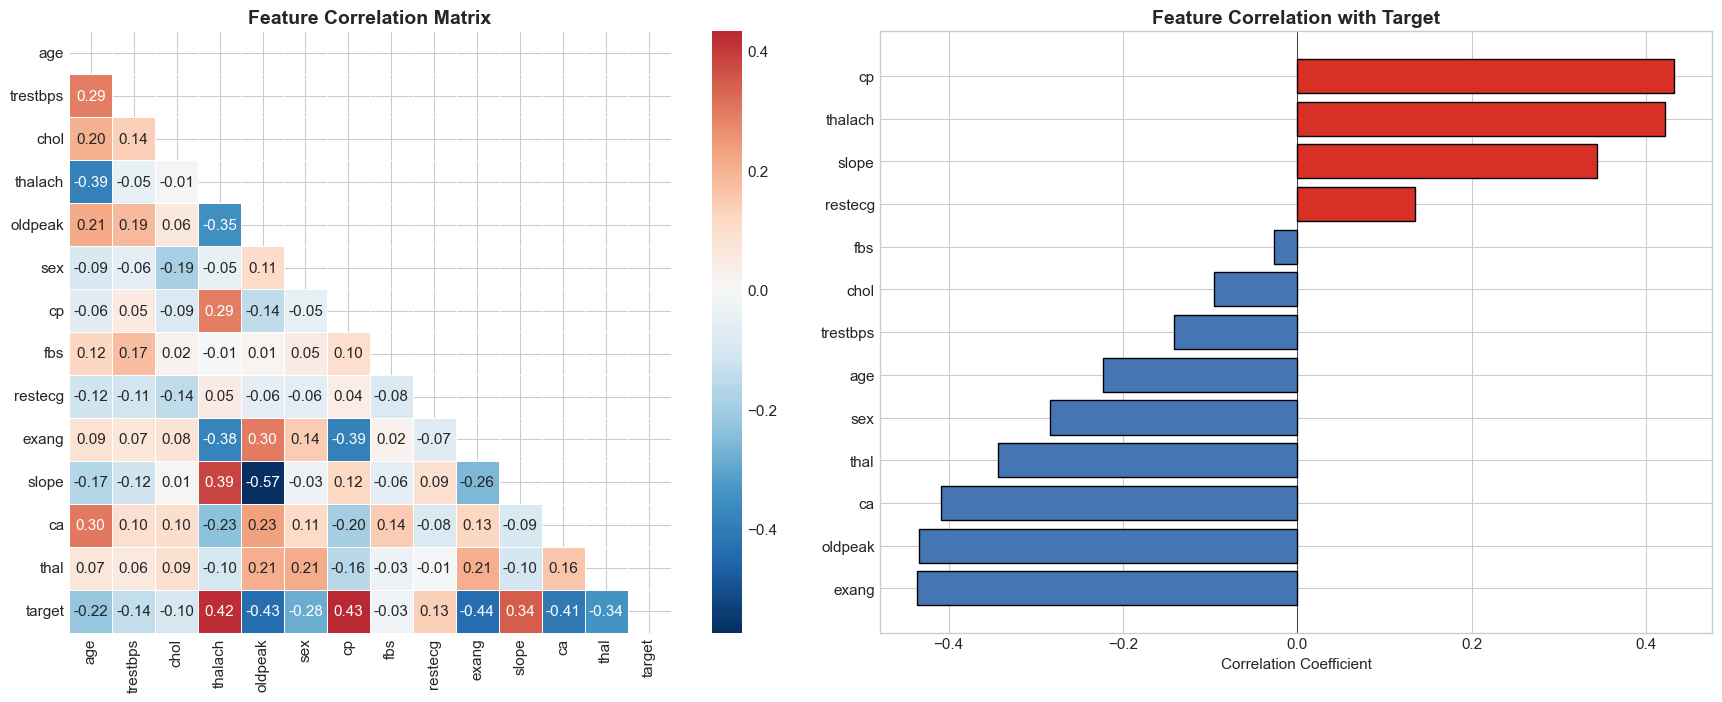

In [73]:
# Correlation matrix
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Full correlation matrix
corr_matrix = df_clean[feature_cols + ['target']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, ax=axes[0], square=True, linewidths=0.5)
axes[0].set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')

# Correlation with target
target_corr = corr_matrix['target'].drop('target').sort_values()
colors = [COLORS['disease'] if x > 0 else COLORS['healthy'] for x in target_corr.values]
axes[1].barh(target_corr.index, target_corr.values, color=colors, edgecolor='black')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
axes[1].set_xlabel('Correlation Coefficient')
axes[1].set_title('Feature Correlation with Target', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

---
# Part 3: Linear Dimensionality Reduction - PCA
---

## 3.1 PCA Analysis

In [74]:
# Apply PCA
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Calculate explained variance
explained_var = pca_full.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

print("PCA ANALYSIS")
print("="*50)
pca_summary = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(explained_var))],
    'Explained Variance %': (explained_var * 100).round(2),
    'Cumulative %': (cumulative_var * 100).round(2)
})
print(pca_summary.to_string(index=False))

PCA ANALYSIS
Component  Explained Variance %  Cumulative %
      PC1                 21.41         21.41
      PC2                 11.89         33.30
      PC3                  9.35         42.65
      PC4                  9.13         51.78
      PC5                  7.75         59.53
      PC6                  7.45         66.99
      PC7                  6.66         73.64
      PC8                  6.02         79.66
      PC9                  5.29         84.96
     PC10                  4.86         89.82
     PC11                  4.05         93.87
     PC12                  3.25         97.12
     PC13                  2.88        100.00


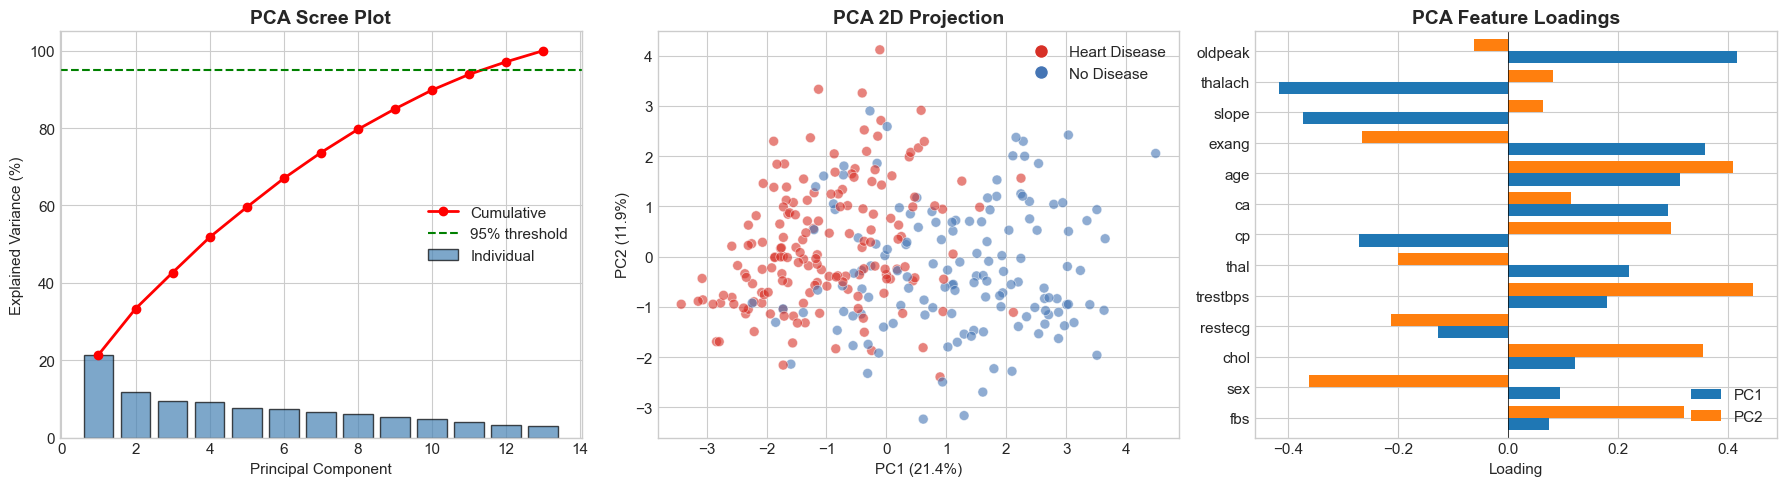

In [75]:
# Visualize PCA results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scree plot
axes[0].bar(range(1, len(explained_var)+1), explained_var*100, 
            alpha=0.7, color='steelblue', edgecolor='black', label='Individual')
axes[0].plot(range(1, len(explained_var)+1), cumulative_var*100, 
             'ro-', linewidth=2, label='Cumulative')
axes[0].axhline(y=95, color='green', linestyle='--', label='95% threshold')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance (%)')
axes[0].set_title('PCA Scree Plot', fontweight='bold')
axes[0].legend()

# 2D PCA projection
colors = [COLORS['healthy'] if label == 0 else COLORS['disease'] for label in y]
axes[1].scatter(X_pca_full[:, 0], X_pca_full[:, 1], c=colors, alpha=0.6, 
                s=50, edgecolors='white', linewidth=0.5)
axes[1].set_xlabel(f'PC1 ({explained_var[0]*100:.1f}%)')
axes[1].set_ylabel(f'PC2 ({explained_var[1]*100:.1f}%)')
axes[1].set_title('PCA 2D Projection', fontweight='bold')

# Add legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=COLORS['disease'], 
           markersize=10, label='Heart Disease'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=COLORS['healthy'], 
           markersize=10, label='No Disease')
]
axes[1].legend(handles=legend_elements)

# Feature loadings
loadings = pd.DataFrame(
    pca_full.components_[:2].T,
    columns=['PC1', 'PC2'],
    index=feature_cols
)
loadings_sorted = loadings.reindex(loadings['PC1'].abs().sort_values(ascending=True).index)
loadings_sorted.plot(kind='barh', ax=axes[2], width=0.8)
axes[2].set_xlabel('Loading')
axes[2].set_title('PCA Feature Loadings', fontweight='bold')
axes[2].axvline(x=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

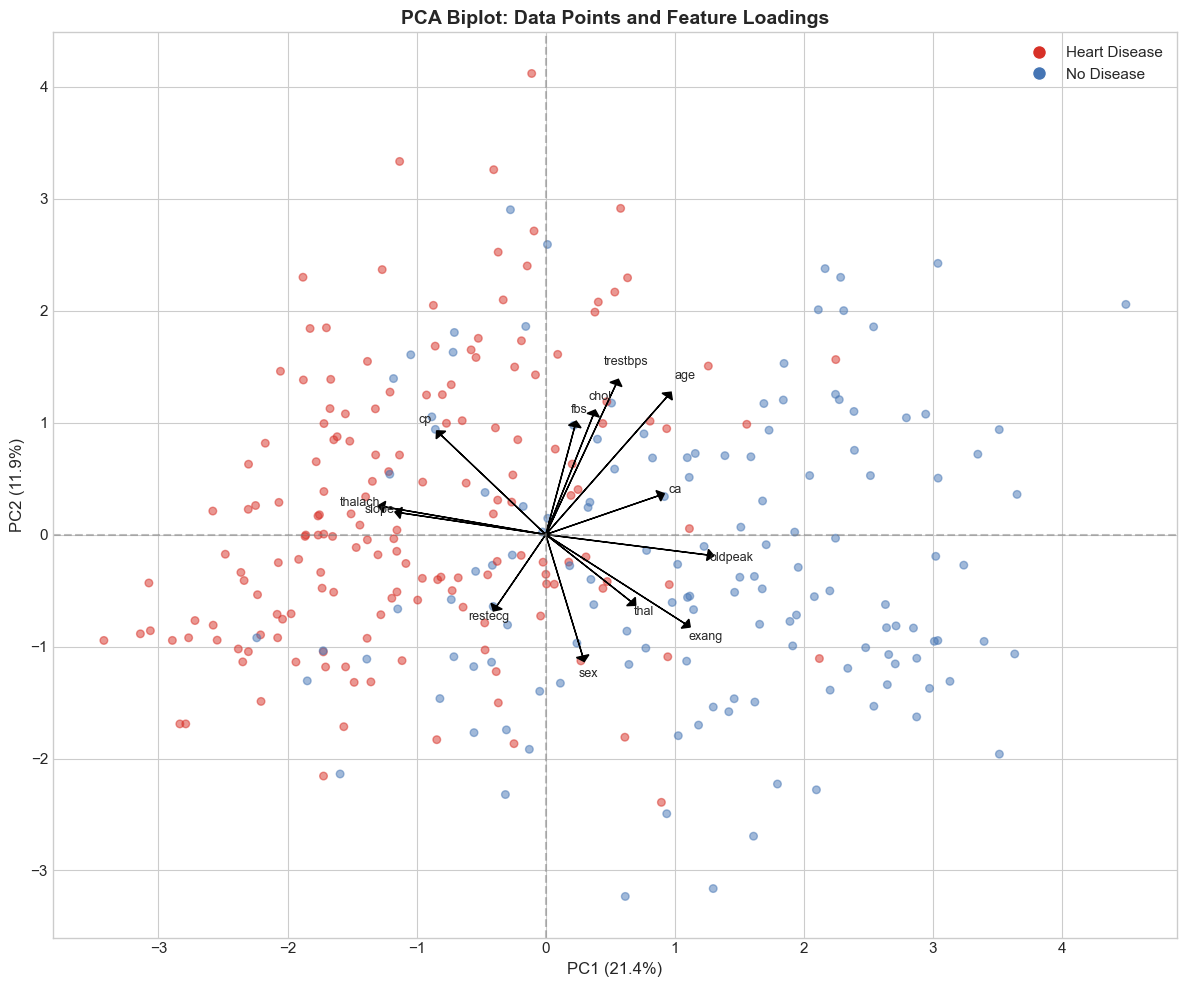

In [76]:
# PCA Biplot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot data points
colors = [COLORS['healthy'] if label == 0 else COLORS['disease'] for label in y]
ax.scatter(X_pca_full[:, 0], X_pca_full[:, 1], c=colors, alpha=0.5, s=30)

# Plot feature vectors
scale = 3
for i, (name, loading) in enumerate(zip(feature_cols, pca_full.components_[:2].T)):
    ax.arrow(0, 0, loading[0]*scale, loading[1]*scale, 
             head_width=0.1, head_length=0.05, fc='black', ec='black')
    ax.text(loading[0]*scale*1.15, loading[1]*scale*1.15, name, 
            fontsize=9, ha='center', va='center')

ax.set_xlabel(f'PC1 ({explained_var[0]*100:.1f}%)', fontsize=12)
ax.set_ylabel(f'PC2 ({explained_var[1]*100:.1f}%)', fontsize=12)
ax.set_title('PCA Biplot: Data Points and Feature Loadings', fontsize=14, fontweight='bold')
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

### PCA Interpretation

**Key Findings:**
- PC1 captures the most variance and is strongly influenced by `thalach` (max heart rate) and `oldpeak` (ST depression)
- PC2 is influenced by `chol` (cholesterol) and `trestbps` (blood pressure)
- The two classes show overlap, indicating that linear separation alone may not be sufficient
- First 5 components explain ~70% of variance

---
# Part 4: Nonlinear Dimensionality Reduction
---

## 4.1 t-SNE Analysis

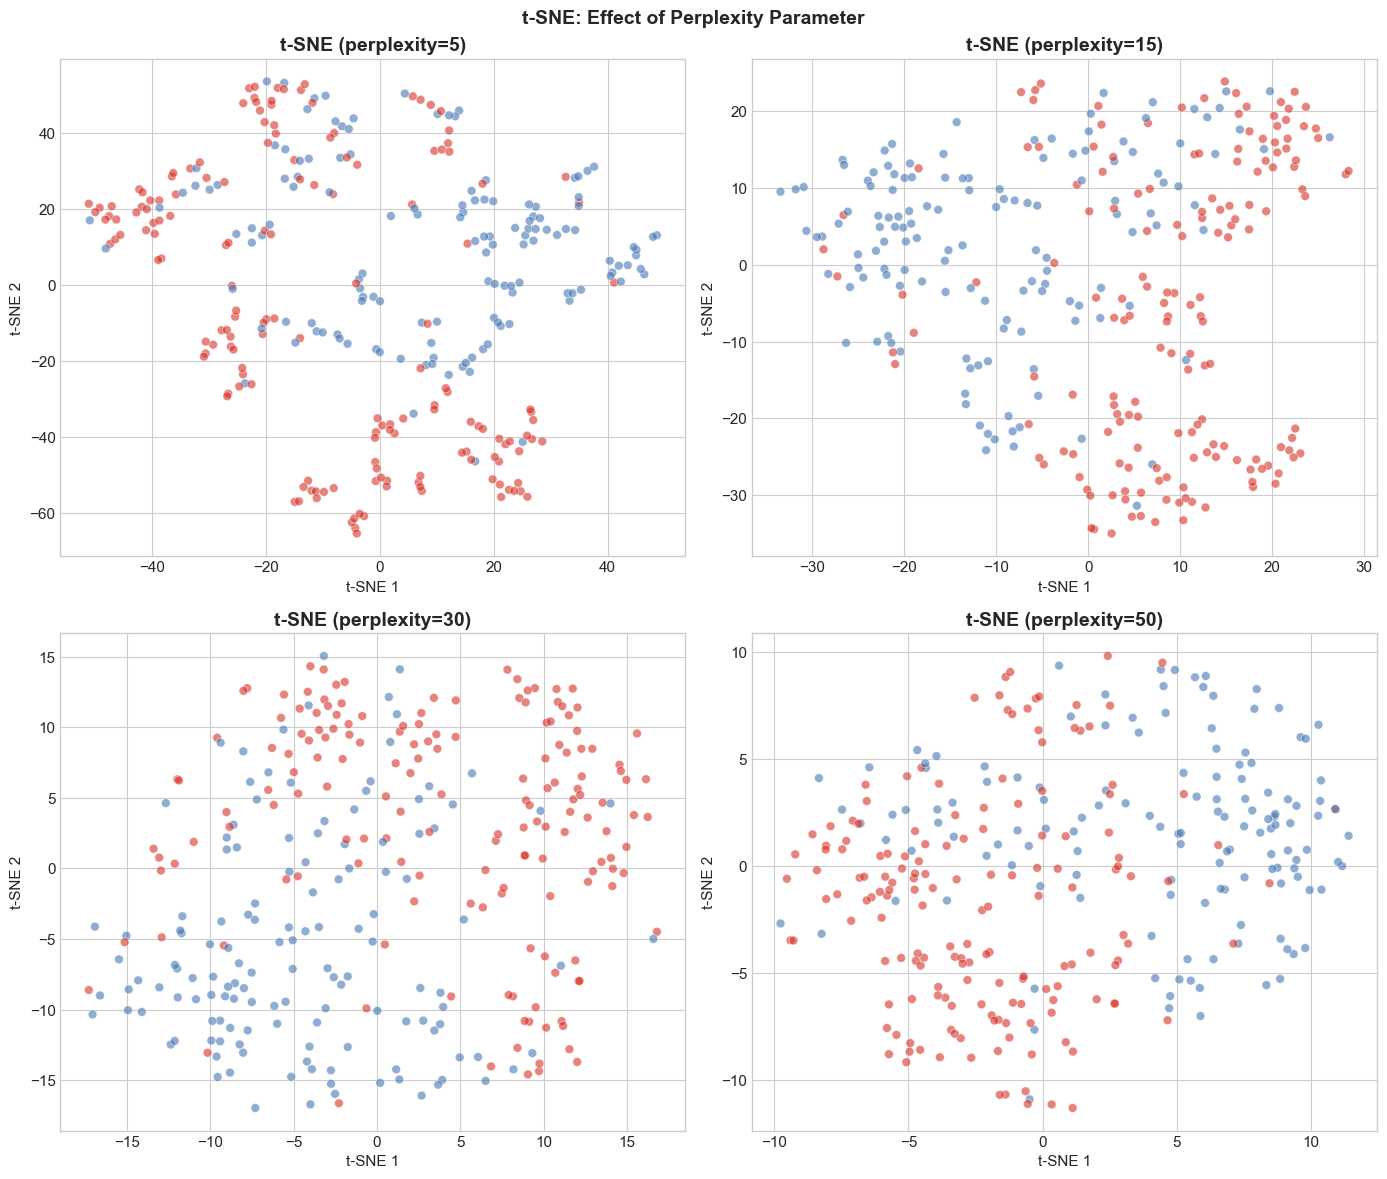

In [77]:
# t-SNE with different perplexity values
perplexities = [5, 15, 30, 50]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

tsne_results = {}

for idx, perp in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42, 
                max_iter=1000, learning_rate='auto', init='pca')
    X_tsne = tsne.fit_transform(X_scaled)
    tsne_results[perp] = X_tsne
    
    colors = [COLORS['healthy'] if label == 0 else COLORS['disease'] for label in y]
    axes[idx].scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, alpha=0.6, 
                      s=40, edgecolors='white', linewidth=0.5)
    axes[idx].set_xlabel('t-SNE 1')
    axes[idx].set_ylabel('t-SNE 2')
    axes[idx].set_title(f't-SNE (perplexity={perp})', fontweight='bold')

plt.suptitle('t-SNE: Effect of Perplexity Parameter', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Store best t-SNE result (perplexity=30 is often a good choice)
X_tsne_best = tsne_results[30]

## 4.2 UMAP Analysis

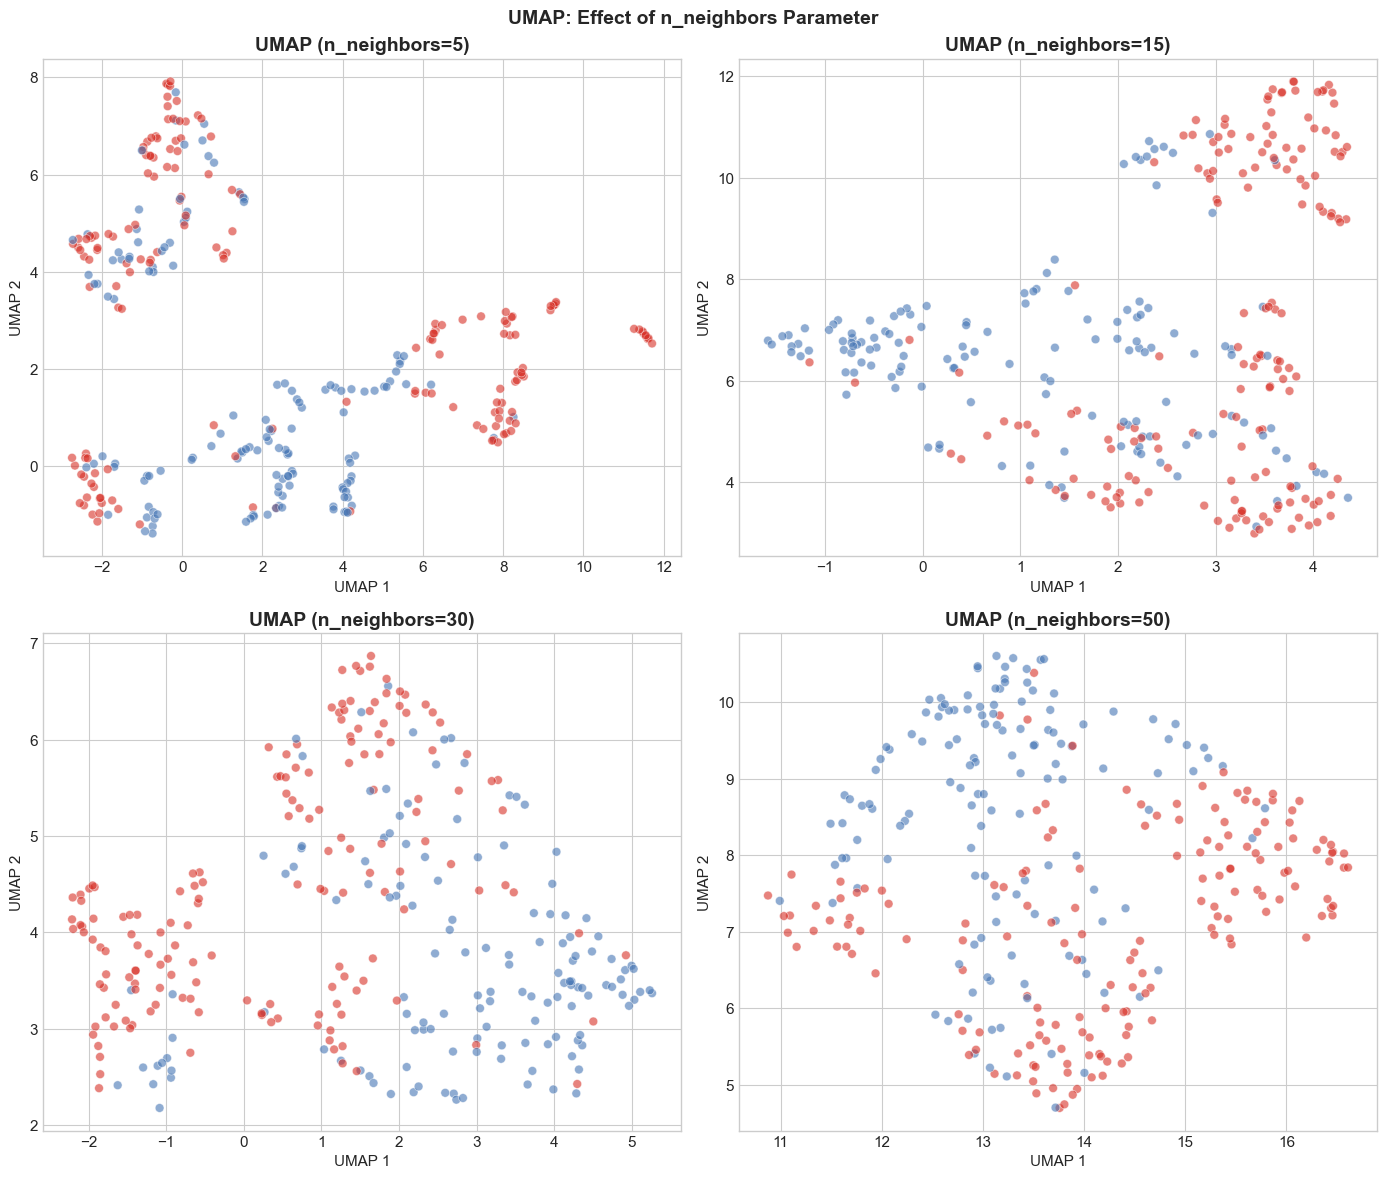

In [78]:
# UMAP with different n_neighbors values
n_neighbors_list = [5, 15, 30, 50]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

umap_results = {}

for idx, n_neigh in enumerate(n_neighbors_list):
    reducer = umap.UMAP(n_neighbors=n_neigh, min_dist=0.1, 
                        n_components=2, random_state=42)
    X_umap = reducer.fit_transform(X_scaled)
    umap_results[n_neigh] = X_umap
    
    colors = [COLORS['healthy'] if label == 0 else COLORS['disease'] for label in y]
    axes[idx].scatter(X_umap[:, 0], X_umap[:, 1], c=colors, alpha=0.6, 
                        s=40, edgecolors='white', linewidth=0.5)
    axes[idx].set_xlabel('UMAP 1')
    axes[idx].set_ylabel('UMAP 2')
    axes[idx].set_title(f'UMAP (n_neighbors={n_neigh})', fontweight='bold')

plt.suptitle('UMAP: Effect of n_neighbors Parameter', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

X_umap_best = umap_results[15]

## 4.3 Comparison: PCA vs t-SNE vs UMAP

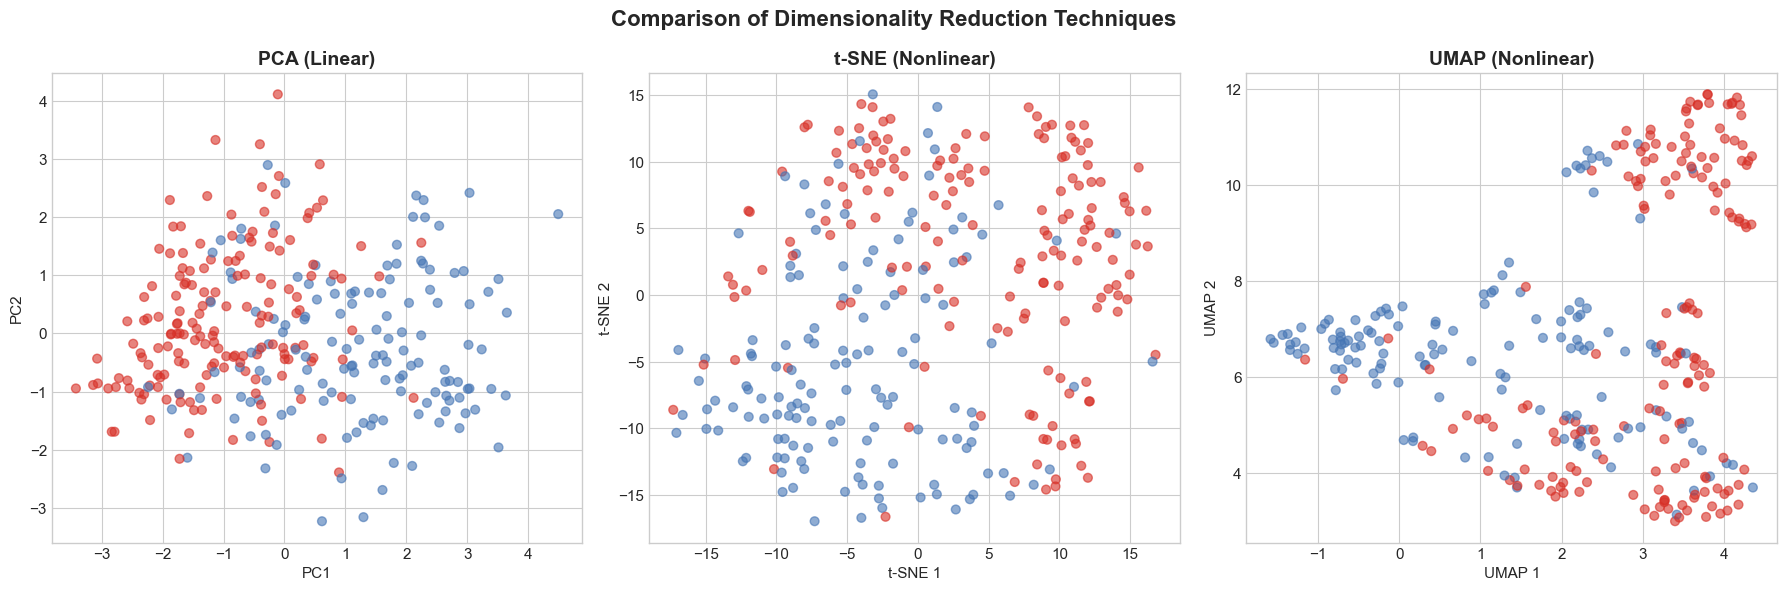

In [79]:
# Side-by-side comparison
n_plots = 3 if UMAP_AVAILABLE else 2
fig, axes = plt.subplots(1, n_plots, figsize=(6*n_plots, 6))

colors = [COLORS['healthy'] if label == 0 else COLORS['disease'] for label in y]

# PCA
axes[0].scatter(X_pca_full[:, 0], X_pca_full[:, 1], c=colors, alpha=0.6, s=40)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('PCA (Linear)', fontweight='bold', fontsize=14)

# t-SNE
axes[1].scatter(X_tsne_best[:, 0], X_tsne_best[:, 1], c=colors, alpha=0.6, s=40)
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].set_title('t-SNE (Nonlinear)', fontweight='bold', fontsize=14)

# UMAP
if UMAP_AVAILABLE:
    axes[2].scatter(X_umap_best[:, 0], X_umap_best[:, 1], c=colors, alpha=0.6, s=40)
    axes[2].set_xlabel('UMAP 1')
    axes[2].set_ylabel('UMAP 2')
    axes[2].set_title('UMAP (Nonlinear)', fontweight='bold', fontsize=14)

plt.suptitle('Comparison of Dimensionality Reduction Techniques', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Comparison Summary

| Method | Type | Preserves | Best For | Limitations |
|--------|------|-----------|----------|-------------|
| **PCA** | Linear | Global variance | Initial exploration, feature extraction | Misses nonlinear structure |
| **t-SNE** | Nonlinear | Local neighborhoods | Visualization, cluster discovery | Non-parametric, computationally expensive |
| **UMAP** | Nonlinear | Local + some global | Visualization, faster than t-SNE | Hyperparameter sensitive |

---
# Part 5: Manifold Learning
---

## 5.1 Isomap (Isometric Mapping)

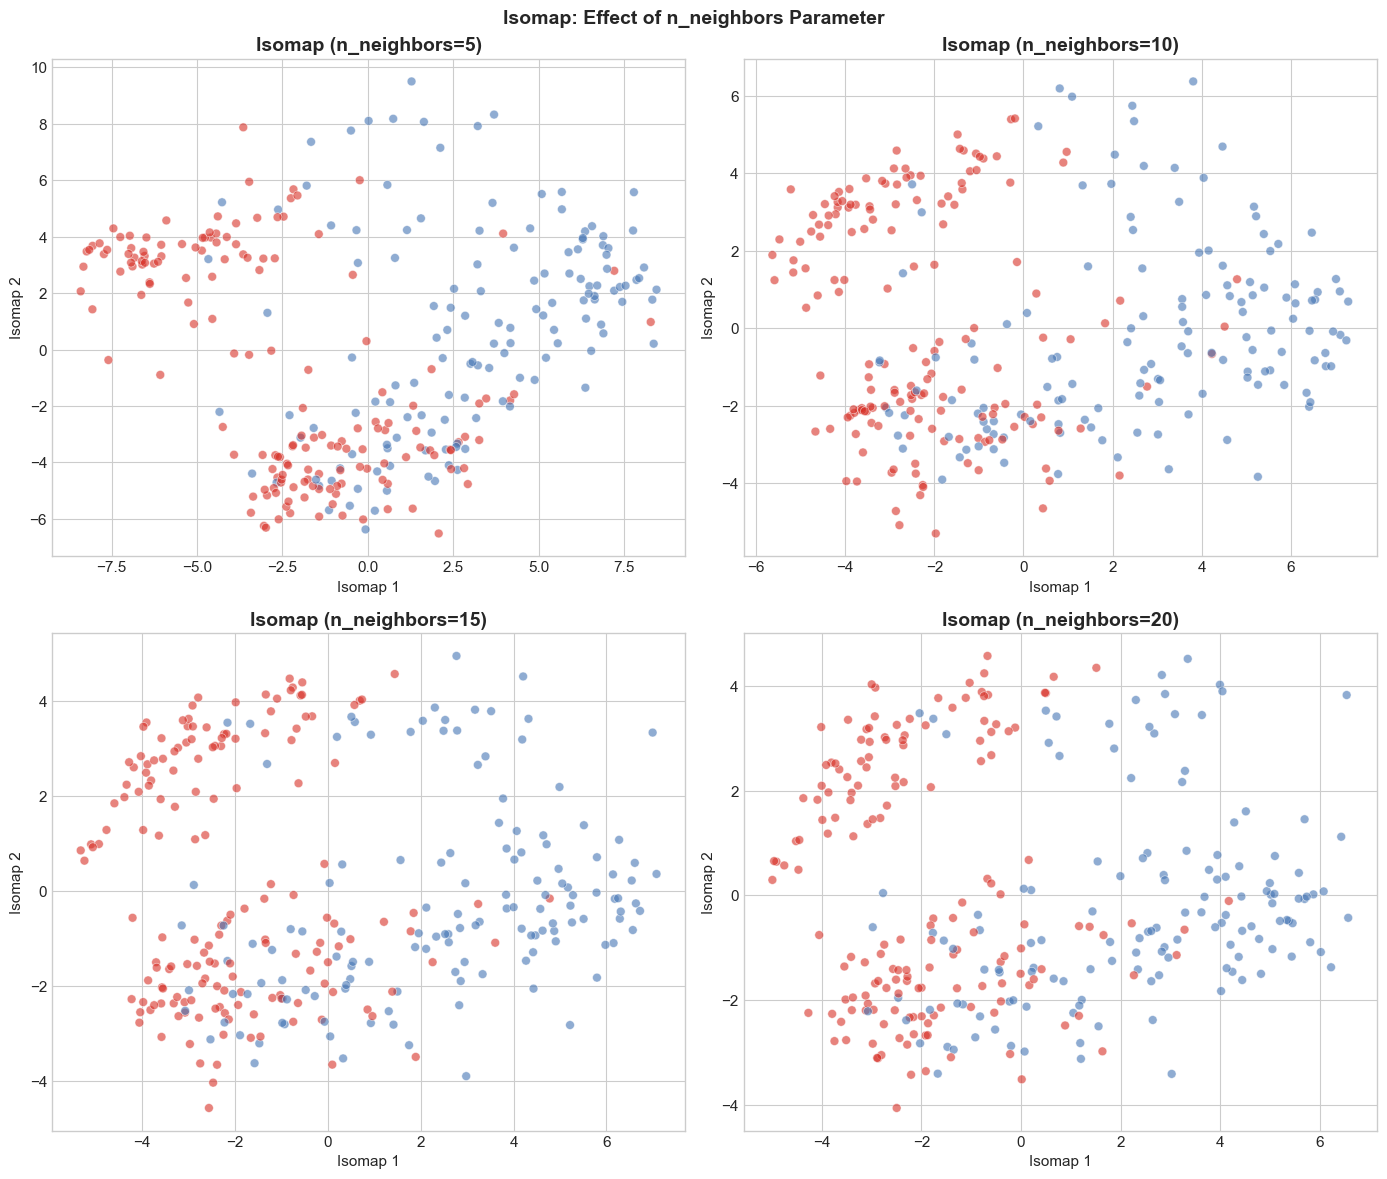

In [80]:
# Isomap with different n_neighbors
n_neighbors_list = [5, 10, 15, 20]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

isomap_results = {}

for idx, n_neigh in enumerate(n_neighbors_list):
    isomap = Isomap(n_neighbors=n_neigh, n_components=2)
    X_isomap = isomap.fit_transform(X_scaled)
    isomap_results[n_neigh] = X_isomap
    
    colors = [COLORS['healthy'] if label == 0 else COLORS['disease'] for label in y]
    axes[idx].scatter(X_isomap[:, 0], X_isomap[:, 1], c=colors, alpha=0.6, 
                      s=40, edgecolors='white', linewidth=0.5)
    axes[idx].set_xlabel('Isomap 1')
    axes[idx].set_ylabel('Isomap 2')
    axes[idx].set_title(f'Isomap (n_neighbors={n_neigh})', fontweight='bold')

plt.suptitle('Isomap: Effect of n_neighbors Parameter', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

X_isomap_best = isomap_results[15]

## 5.2 Locally Linear Embedding (LLE)

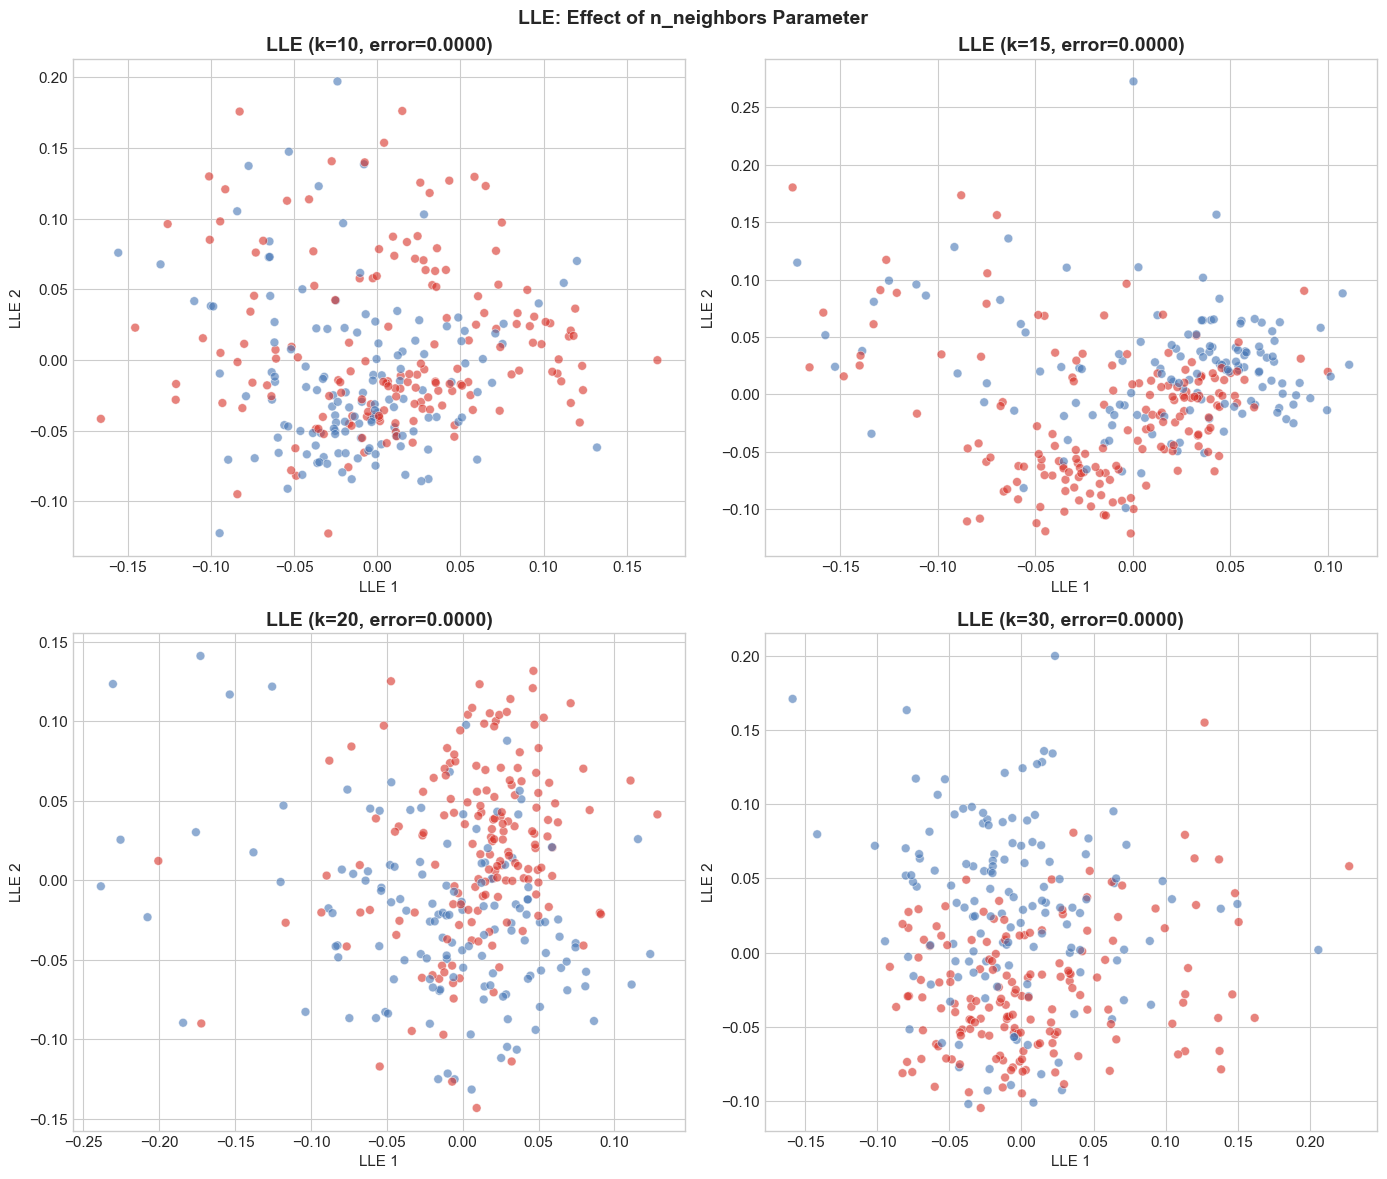

In [81]:
# LLE with different n_neighbors
n_neighbors_list = [10, 15, 20, 30]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

lle_results = {}

for idx, n_neigh in enumerate(n_neighbors_list):
    lle = LocallyLinearEmbedding(
        n_neighbors=n_neigh,
        n_components=2,
        method='standard',
        eigen_solver='dense',
        reg=1e-3,
        random_state=42
    )
    X_lle = lle.fit_transform(X_scaled)
    lle_results[n_neigh] = (X_lle, lle.reconstruction_error_)
    
    colors = [COLORS['healthy'] if label == 0 else COLORS['disease'] for label in y]
    axes[idx].scatter(X_lle[:, 0], X_lle[:, 1], c=colors, alpha=0.6, 
                      s=40, edgecolors='white', linewidth=0.5)
    axes[idx].set_xlabel('LLE 1')
    axes[idx].set_ylabel('LLE 2')
    axes[idx].set_title(f'LLE (k={n_neigh}, error={lle.reconstruction_error_:.4f})', fontweight='bold')

plt.suptitle('LLE: Effect of n_neighbors Parameter', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

X_lle_best = lle_results[15][0]

## 5.3 LLE Variants Comparison

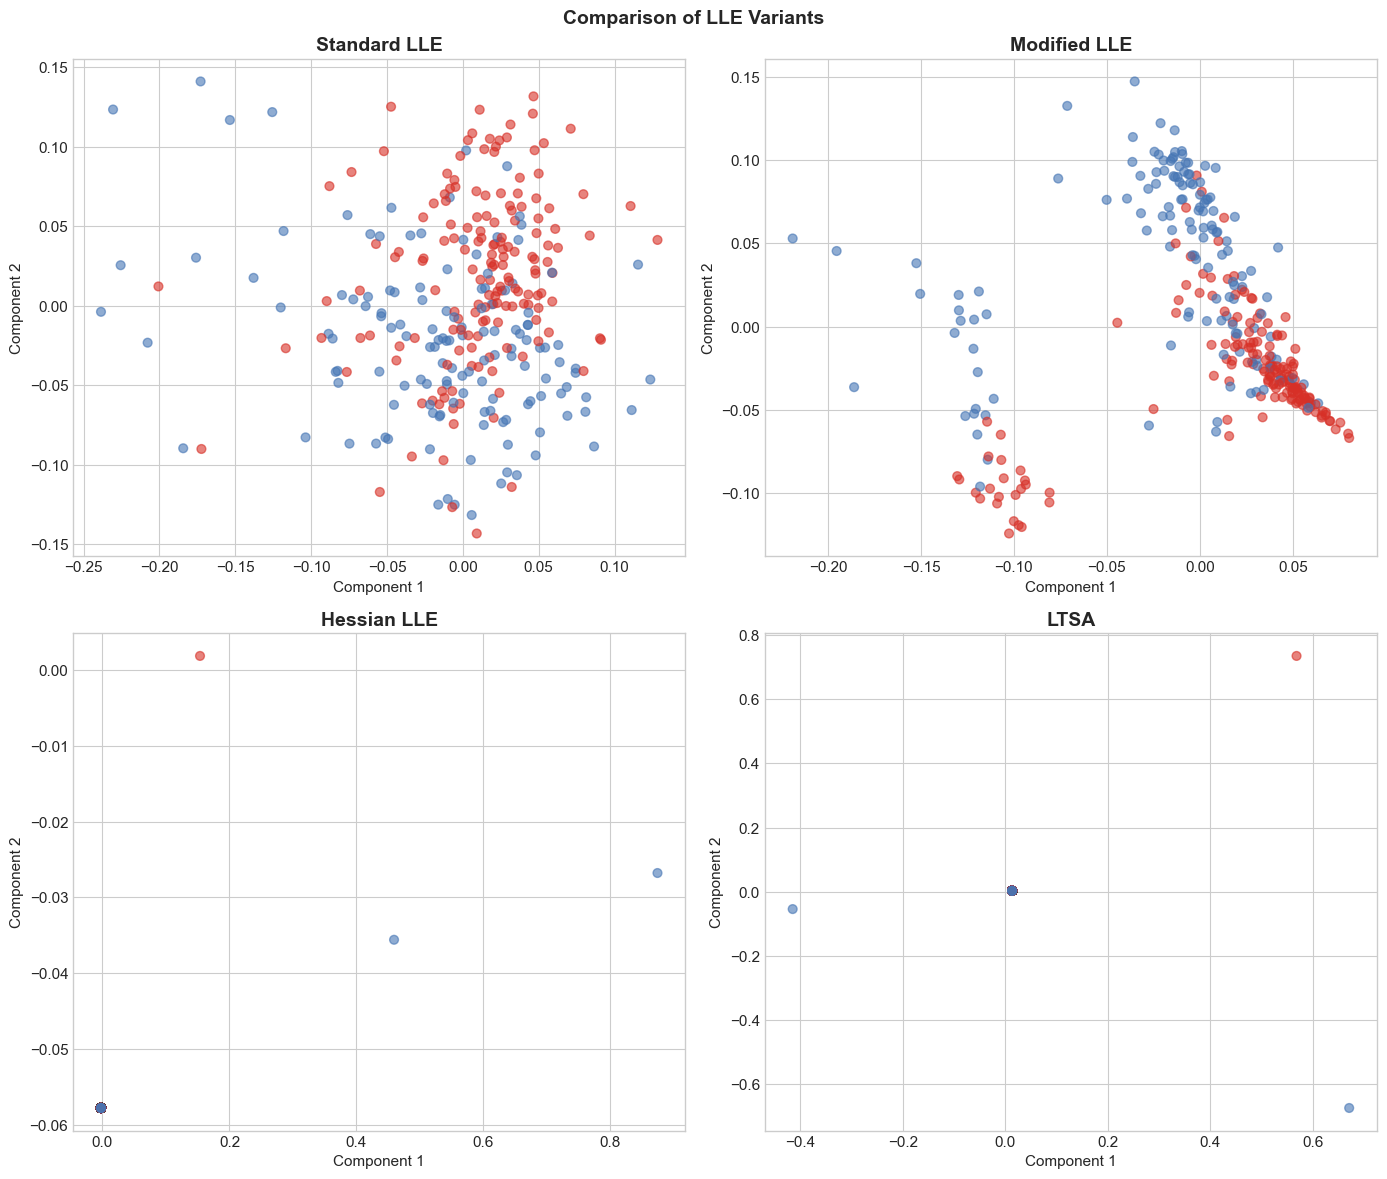

In [82]:
# Compare different LLE methods
methods = ['standard', 'modified', 'hessian', 'ltsa']
method_names = ['Standard LLE', 'Modified LLE', 'Hessian LLE', 'LTSA']

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

n_neighbors_lle = 20

for idx, (method, name) in enumerate(zip(methods, method_names)):
    try:
        lle_variant = LocallyLinearEmbedding(
            n_neighbors=n_neighbors_lle,
            n_components=2,
            method=method,
            eigen_solver='dense',
            reg=1e-3,
            random_state=42
        )
        X_variant = lle_variant.fit_transform(X_scaled)
        
        colors = [COLORS['healthy'] if label == 0 else COLORS['disease'] for label in y]
        axes[idx].scatter(X_variant[:, 0], X_variant[:, 1], c=colors, alpha=0.6, s=40)
        axes[idx].set_title(f'{name}', fontweight='bold')
    except Exception as e:
        axes[idx].text(0.5, 0.5, f'Error: {str(e)[:40]}...', 
                      transform=axes[idx].transAxes, ha='center')
        axes[idx].set_title(f'{name} (failed)', fontweight='bold')
    
    axes[idx].set_xlabel('Component 1')
    axes[idx].set_ylabel('Component 2')

plt.suptitle('Comparison of LLE Variants', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 5.4 Manifold Learning Comparison

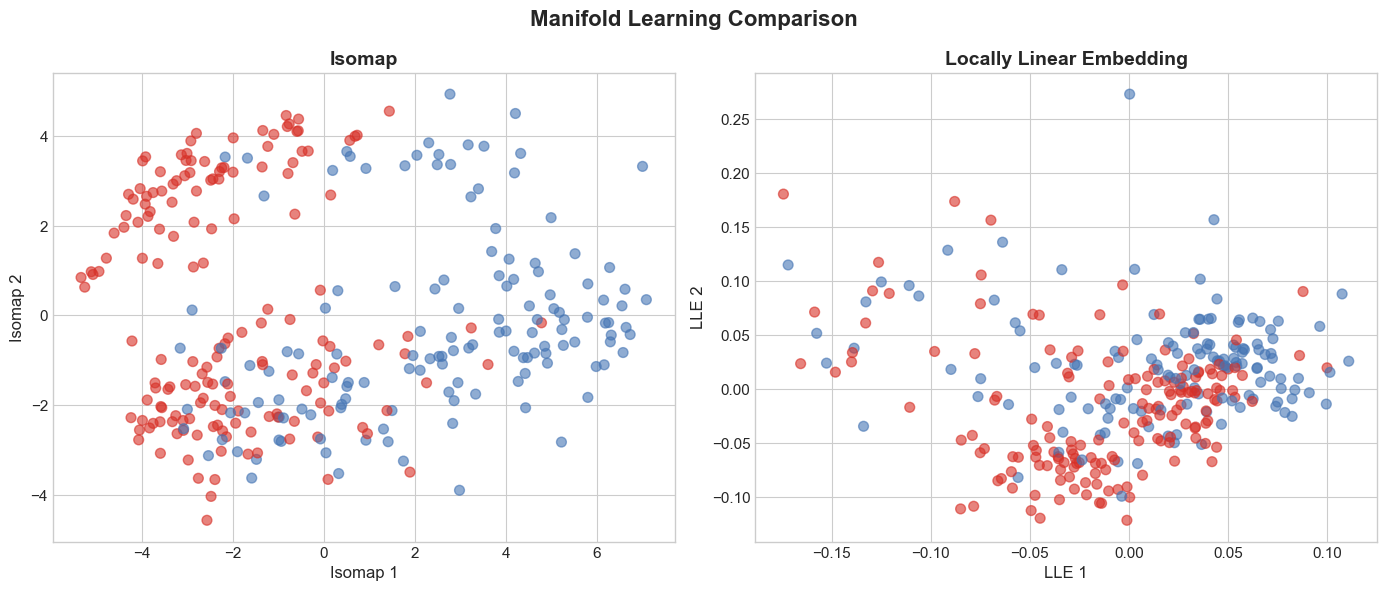

In [83]:
# Compare Isomap vs LLE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

colors = [COLORS['healthy'] if label == 0 else COLORS['disease'] for label in y]

# Isomap
axes[0].scatter(X_isomap_best[:, 0], X_isomap_best[:, 1], c=colors, alpha=0.6, s=50)
axes[0].set_xlabel('Isomap 1', fontsize=12)
axes[0].set_ylabel('Isomap 2', fontsize=12)
axes[0].set_title('Isomap', fontweight='bold', fontsize=14)

# LLE
axes[1].scatter(X_lle_best[:, 0], X_lle_best[:, 1], c=colors, alpha=0.6, s=50)
axes[1].set_xlabel('LLE 1', fontsize=12)
axes[1].set_ylabel('LLE 2', fontsize=12)
axes[1].set_title('Locally Linear Embedding', fontweight='bold', fontsize=14)

plt.suptitle('Manifold Learning Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Manifold Learning Interpretation

**Isomap:**
- Preserves geodesic (manifold) distances
- Good at unfolding curved manifolds
- Maintains global structure better than LLE

**LLE:**
- Preserves local linear relationships
- Each point reconstructed from neighbors
- Better for complex local structures

**Observation:** Both methods reveal that heart disease patients don't form a completely separate cluster, but rather form a continuum with healthy patients. This reflects the gradual nature of heart disease development.

---
# Part 6: Comprehensive Visualizations
---

## 6.1 All Methods Comparison Dashboard

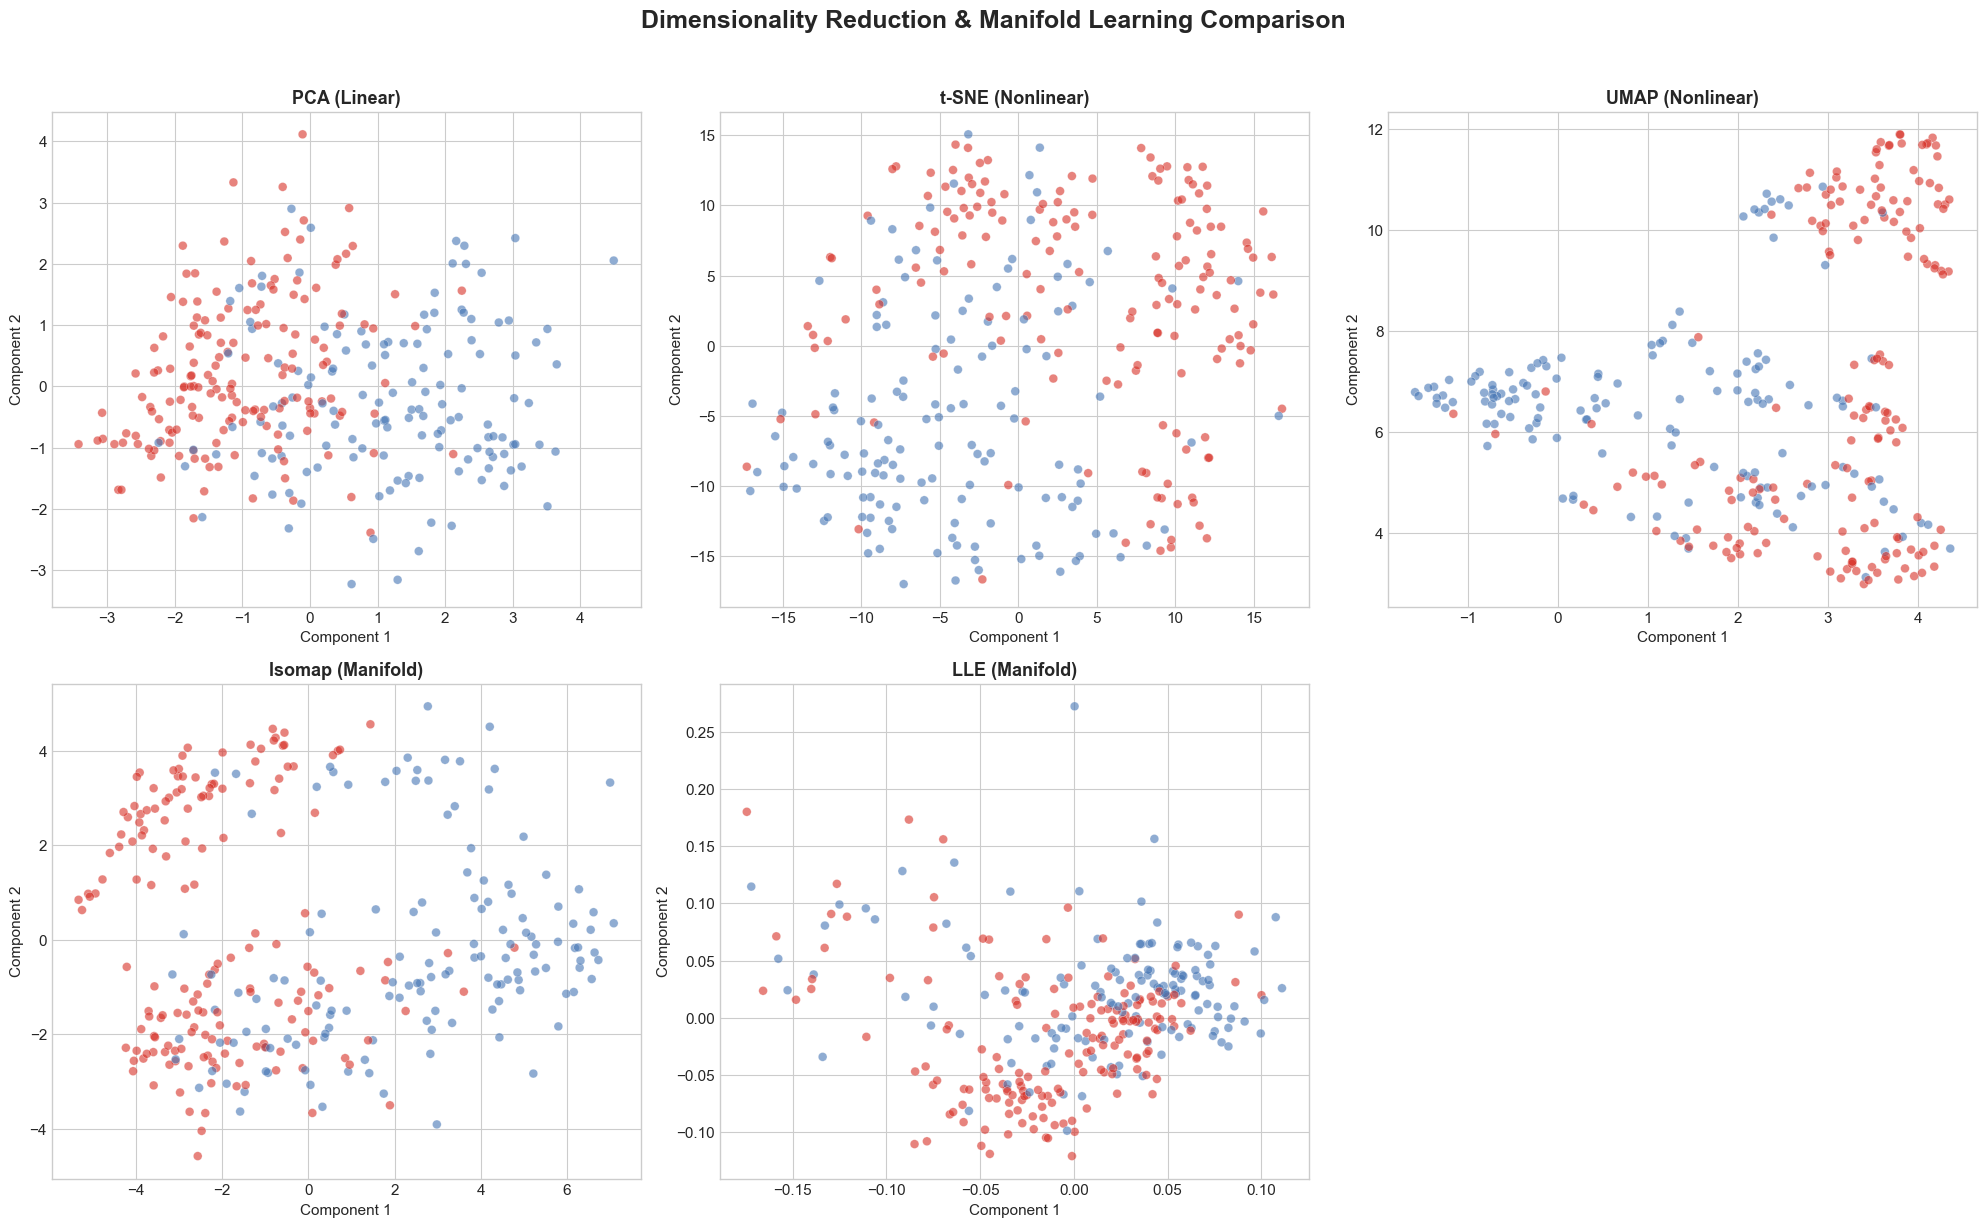

In [84]:
# Comprehensive comparison of all methods
fig = plt.figure(figsize=(20, 12))

colors = [COLORS['healthy'] if label == 0 else COLORS['disease'] for label in y]

methods_data = [
    (X_pca_full[:, :2], 'PCA', 'Linear'),
    (X_tsne_best, 't-SNE', 'Nonlinear'),
    (X_isomap_best, 'Isomap', 'Manifold'),
    (X_lle_best, 'LLE', 'Manifold'),
]

if UMAP_AVAILABLE:
    methods_data.insert(2, (X_umap_best, 'UMAP', 'Nonlinear'))

n_methods = len(methods_data)
cols = 3
rows = (n_methods + cols - 1) // cols

for idx, (X_reduced, name, method_type) in enumerate(methods_data):
    ax = fig.add_subplot(rows, cols, idx + 1)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colors, alpha=0.6, s=40,
               edgecolors='white', linewidth=0.3)
    ax.set_title(f'{name} ({method_type})', fontweight='bold', fontsize=13)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')

plt.suptitle('Dimensionality Reduction & Manifold Learning Comparison', 
             fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 6.2 Feature Distributions in Reduced Space

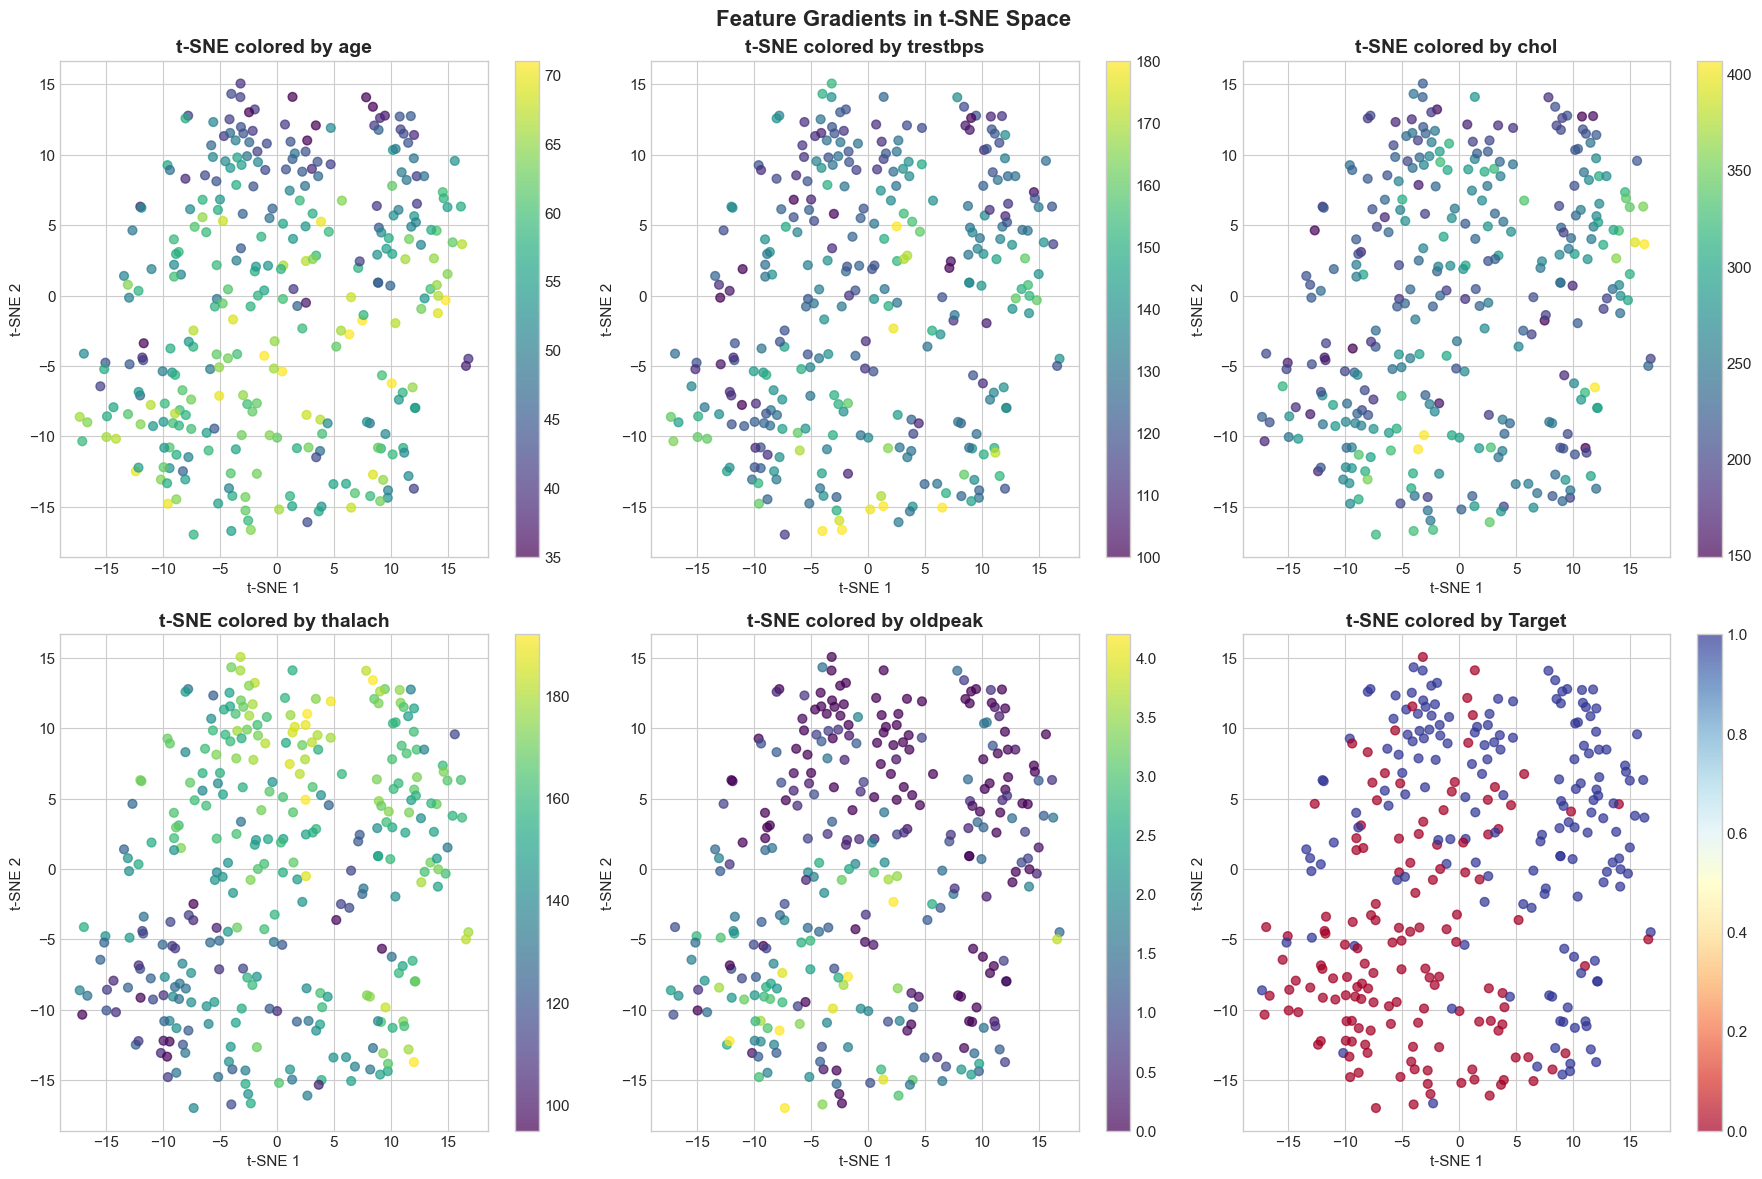

In [85]:
# Visualize how features map to t-SNE space
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, feat in enumerate(continuous_features):
    sc = axes[idx].scatter(
        X_tsne_best[:, 0], X_tsne_best[:, 1],
        c=df_clean[feat].values,
        cmap='viridis',
        alpha=0.7,
        s=40
    )
    axes[idx].set_title(f't-SNE colored by {feat}', fontweight='bold')
    axes[idx].set_xlabel('t-SNE 1')
    axes[idx].set_ylabel('t-SNE 2')
    plt.colorbar(sc, ax=axes[idx])

# Last plot: target
sc = axes[5].scatter(
    X_tsne_best[:, 0], X_tsne_best[:, 1],
    c=y, cmap='RdYlBu', alpha=0.7, s=40
)
axes[5].set_title('t-SNE colored by Target', fontweight='bold')
axes[5].set_xlabel('t-SNE 1')
axes[5].set_ylabel('t-SNE 2')
plt.colorbar(sc, ax=axes[5])

plt.suptitle('Feature Gradients in t-SNE Space', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 6.3 Interactive 3D Visualization (if Plotly available)

In [86]:
# 3D PCA visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Create dataframe for plotting
plot_df = pd.DataFrame({
    'PC1': X_pca_3d[:, 0],
    'PC2': X_pca_3d[:, 1],
    'PC3': X_pca_3d[:, 2],
    'Target': ['Disease' if t == 1 else 'Healthy' for t in y],
    'Age': df_clean['age'],
    'Max HR': df_clean['thalach'],
    'Cholesterol': df_clean['chol']
})

fig = px.scatter_3d(
    plot_df, x='PC1', y='PC2', z='PC3',
    color='Target',
    color_discrete_map={'Disease': COLORS['disease'], 'Healthy': COLORS['healthy']},
    hover_data=['Age', 'Max HR', 'Cholesterol'],
    title='Interactive 3D PCA Visualization',
    opacity=0.7
)
fig.update_layout(height=700)
fig.show()

## 6.4 Density Plots and Class Separation

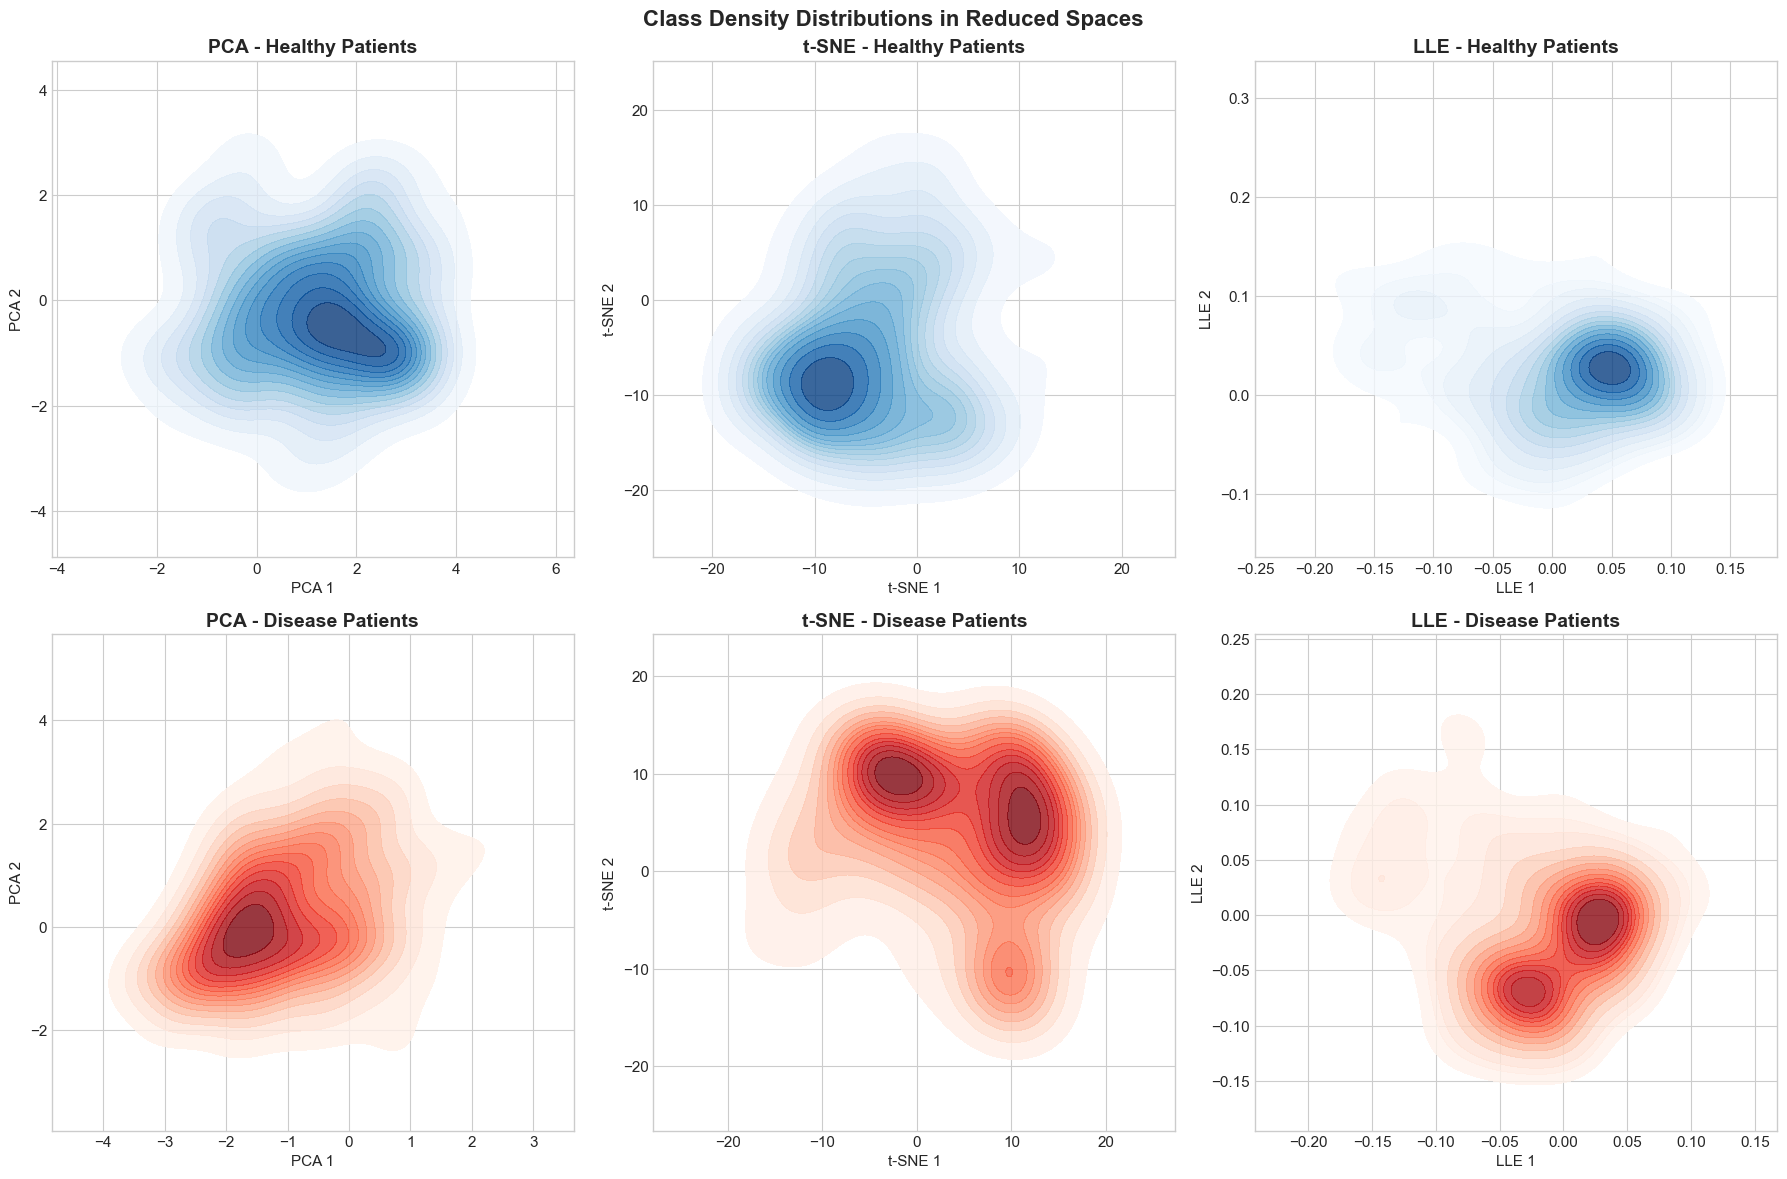

In [87]:
# 2D Density estimation for each class
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

embeddings = [
    (X_pca_full[:, :2], 'PCA'),
    (X_tsne_best, 't-SNE'),
    (X_lle_best, 'LLE')
]

for col, (X_emb, name) in enumerate(embeddings):
    # Healthy
    mask_healthy = y == 0
    sns.kdeplot(x=X_emb[mask_healthy, 0], y=X_emb[mask_healthy, 1], 
                ax=axes[0, col], fill=True, cmap='Blues', levels=15, alpha=0.8)
    axes[0, col].set_title(f'{name} - Healthy Patients', fontweight='bold')
    axes[0, col].set_xlabel(f'{name} 1')
    axes[0, col].set_ylabel(f'{name} 2')
    
    # Disease
    mask_disease = y == 1
    sns.kdeplot(x=X_emb[mask_disease, 0], y=X_emb[mask_disease, 1], 
                ax=axes[1, col], fill=True, cmap='Reds', levels=15, alpha=0.8)
    axes[1, col].set_title(f'{name} - Disease Patients', fontweight='bold')
    axes[1, col].set_xlabel(f'{name} 1')
    axes[1, col].set_ylabel(f'{name} 2')

plt.suptitle('Class Density Distributions in Reduced Spaces', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 6.5 Interactive Dashboard (Plotly)

In [88]:
# Create comprehensive dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('PCA', 't-SNE', 'Isomap', 'LLE'),
    horizontal_spacing=0.1,
    vertical_spacing=0.15
)

embeddings_plotly = [
    (X_pca_full[:, :2], 1, 1),
    (X_tsne_best, 1, 2),
    (X_isomap_best, 2, 1),
    (X_lle_best, 2, 2)
]

for X_emb, row, col in embeddings_plotly:
    for label, name, color in [(0, 'Healthy', COLORS['healthy']), (1, 'Disease', COLORS['disease'])]:
        mask = y == label
        fig.add_trace(
            go.Scatter(
                x=X_emb[mask, 0],
                y=X_emb[mask, 1],
                mode='markers',
                name=name,
                marker=dict(color=color, size=6, opacity=0.6),
                legendgroup=name,
                showlegend=(row == 1 and col == 1)
            ),
            row=row, col=col
        )

fig.update_layout(
    height=800,
    title_text="Interactive Dimensionality Reduction Dashboard",
    title_font_size=18
)
fig.show()

---
# Part 7: Data Ethics and Responsible AI
---

## 7.1 Ethical Considerations in Medical Data Analysis

### Privacy Concerns

**1. Re-identification Risk:**
Even with anonymized data, combinations of attributes (age, sex, medical conditions) could potentially re-identify individuals, especially in smaller populations.

**2. Sensitive Health Information:**
Heart disease status is protected health information (PHI) under regulations like HIPAA. Any analysis must ensure:
- Data is properly de-identified
- Access is restricted to authorized personnel
- Results don't reveal individual patient information

### Bias Analysis

In [89]:
# Analyze potential biases in the dataset
print("DEMOGRAPHIC BIAS ANALYSIS")
print("="*50)

# Sex distribution
sex_dist = df_clean.groupby('sex')['target'].agg(['count', 'mean']).round(3)
sex_dist.index = ['Female', 'Male']
sex_dist.columns = ['Count', 'Disease Rate']
print("\nSex Distribution:")
print(sex_dist)

# Age distribution by target
print("\nAge Statistics by Target:")
print(df_clean.groupby('target')['age'].describe().round(2))

DEMOGRAPHIC BIAS ANALYSIS

Sex Distribution:
        Count  Disease Rate
Female     96         0.750
Male      206         0.447

Age Statistics by Target:
        count   mean   std   min    25%   50%   75%   max
target                                                   
0       138.0  56.56  7.87  35.0  52.00  58.0  62.0  71.0
1       164.0  52.59  9.30  35.0  44.75  52.0  59.0  71.0


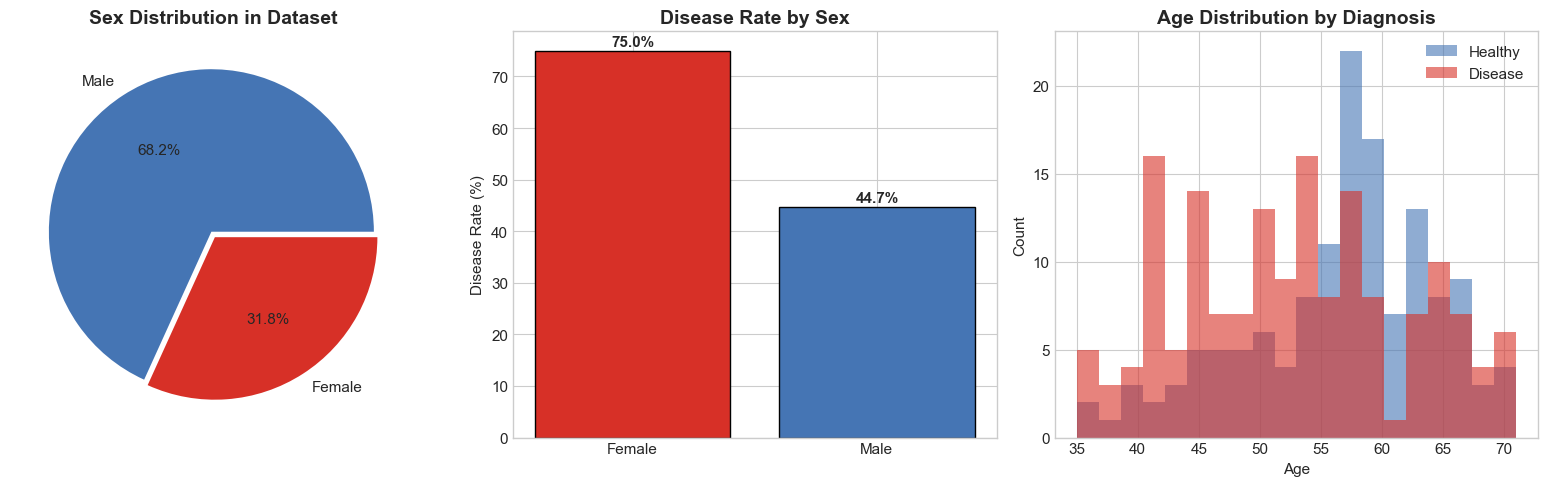

In [90]:
# Visualize demographic biases
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Sex imbalance
sex_counts = df_clean['sex'].value_counts()
axes[0].pie(sex_counts.values, labels=['Male', 'Female'], autopct='%1.1f%%',
            colors=['#4575b4', '#d73027'], explode=[0.02, 0.02])
axes[0].set_title('Sex Distribution in Dataset', fontweight='bold')

# Disease rate by sex
disease_by_sex = df_clean.groupby('sex')['target'].mean()
bars = axes[1].bar(['Female', 'Male'], disease_by_sex.values * 100,
                   color=[COLORS['disease'], COLORS['healthy']], edgecolor='black')
axes[1].set_ylabel('Disease Rate (%)')
axes[1].set_title('Disease Rate by Sex', fontweight='bold')
for bar, val in zip(bars, disease_by_sex.values * 100):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 f'{val:.1f}%', ha='center', fontweight='bold')

# Age distribution
for label, name, color in [(0, 'Healthy', COLORS['healthy']), (1, 'Disease', COLORS['disease'])]:
    mask = df_clean['target'] == label
    axes[2].hist(df_clean[mask]['age'], bins=20, alpha=0.6, label=name, color=color)
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Count')
axes[2].set_title('Age Distribution by Diagnosis', fontweight='bold')
axes[2].legend()

plt.tight_layout()
plt.show()

### 7.2 Identified Biases and Mitigation Strategies

| Bias Type | Finding | Potential Impact | Mitigation |
|-----------|---------|------------------|------------|
| **Sex Imbalance** | Dataset is ~68% male | Models may perform worse for females | Stratified sampling, re-weighting |
| **Age Distribution** | Concentrated in 50-65 range | Poor generalization to younger/older patients | Include diverse age groups in future studies |
| **Selection Bias** | Hospital-based sample | May not represent general population | Multi-center data collection |

### 7.3 GDPR Compliance Considerations

**Article 9 - Processing of Special Categories:**
Health data requires explicit consent or specific legal basis for processing.

**Key Requirements:**
1. **Lawful Basis:** Research must have legitimate purpose
2. **Data Minimization:** Use only necessary data
3. **Storage Limitation:** Define retention period
4. **Right to Erasure:** Individuals can request data deletion
5. **Data Protection Impact Assessment:** Required for health data processing

In [91]:
# GDPR-style data inventory
print("DATA INVENTORY (GDPR Article 30)")
print("="*60)

data_inventory = pd.DataFrame({
    'Data Category': ['Direct Identifiers', 'Health Data', 'Demographic', 'Clinical Measurements'],
    'Examples': ['None (de-identified)', 'target, ca, thal', 'age, sex', 'trestbps, chol, thalach, oldpeak'],
    'Sensitivity': ['N/A', 'High', 'Medium', 'High'],
    'Legal Basis': ['N/A', 'Research Exemption', 'Legitimate Interest', 'Research Exemption'],
    'Retention': ['Study duration', 'Study duration + 5yr', 'Study duration', 'Study duration + 5yr']
})
print(data_inventory.to_string(index=False))

DATA INVENTORY (GDPR Article 30)
        Data Category                         Examples Sensitivity         Legal Basis            Retention
   Direct Identifiers             None (de-identified)         N/A                 N/A       Study duration
          Health Data                 target, ca, thal        High  Research Exemption Study duration + 5yr
          Demographic                         age, sex      Medium Legitimate Interest       Study duration
Clinical Measurements trestbps, chol, thalach, oldpeak        High  Research Exemption Study duration + 5yr


### 7.4 Responsible AI Recommendations

**For this analysis:**
1. Used de-identified public dataset
2. Documented data biases
3. Provided transparent methodology
4. Model should not be used for individual diagnosis
5. Results should be validated on diverse populations

**For production deployment:**
- Implement differential privacy for sensitive queries
- Regular bias audits across demographic groups
- Human-in-the-loop for clinical decisions
- Clear documentation of limitations

---
# Part 8: Data Storytelling and Conclusions
---

## 8.1 The Story of Heart Disease Data

### The Challenge

Heart disease is the leading cause of death globally. Early detection is crucial, but the complexity of factors involved makes diagnosis challenging. Our dataset contains 13 clinical measurements from patients, each telling part of the story of their heart health.

### What the Data Reveals

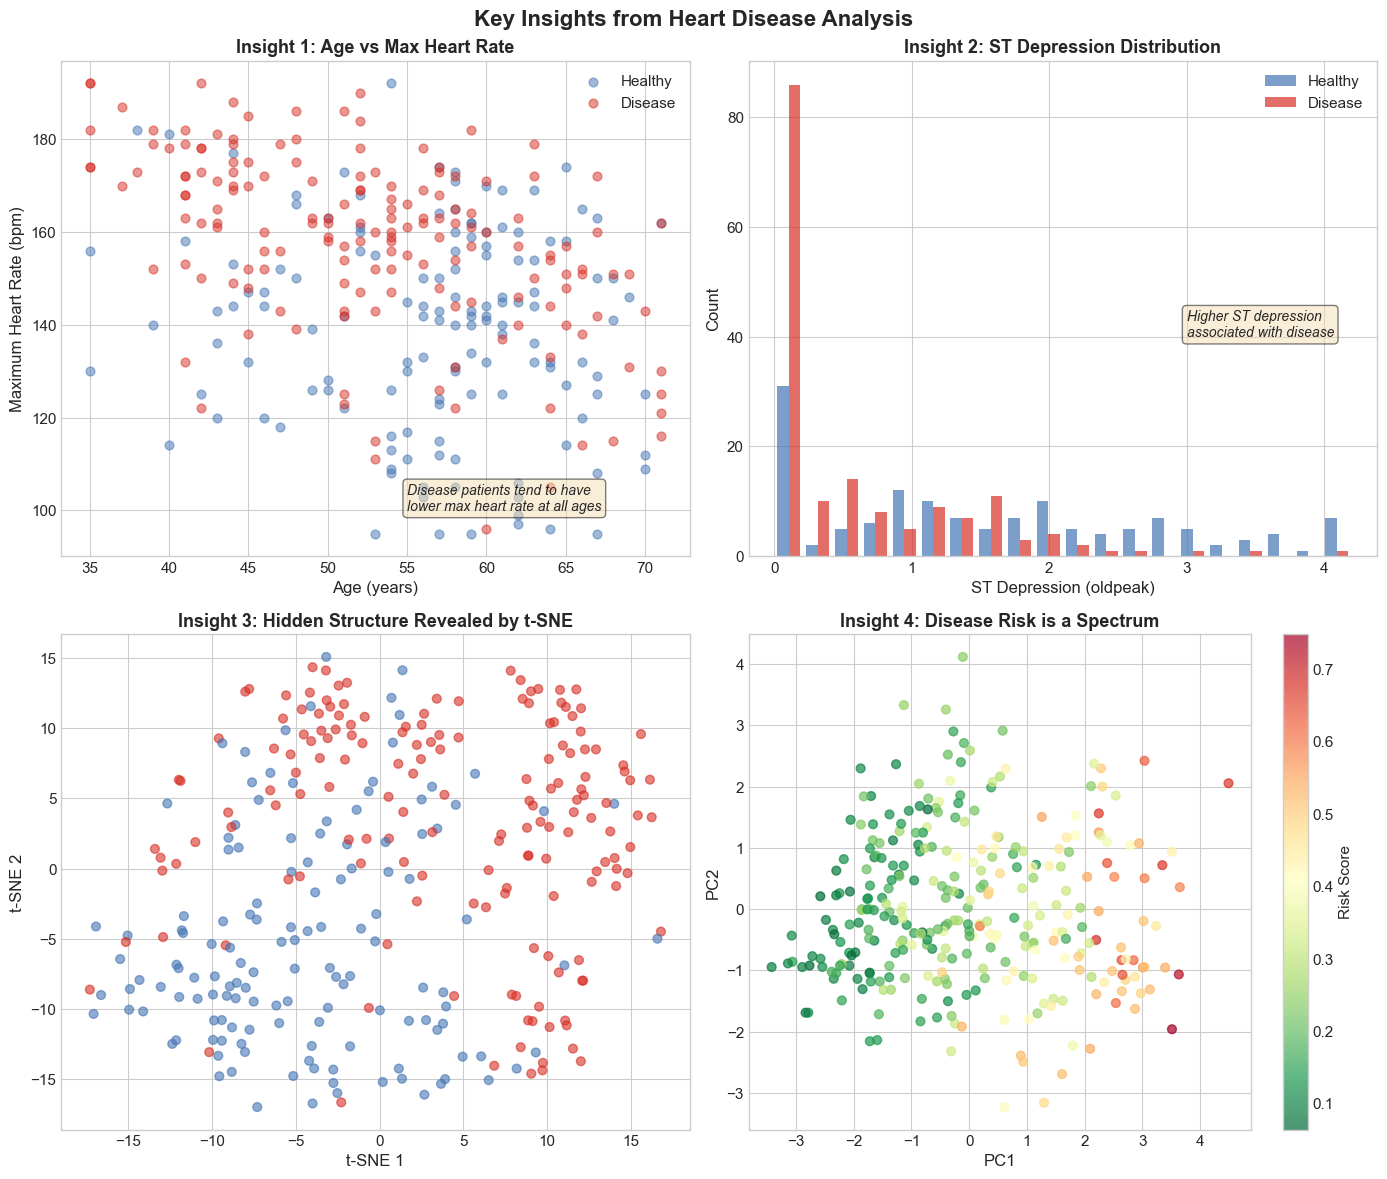

In [92]:
# Key insights visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. The Age-Heart Rate Relationship
ax = axes[0, 0]
for label, name, color in [(0, 'Healthy', COLORS['healthy']), (1, 'Disease', COLORS['disease'])]:
    mask = df_clean['target'] == label
    ax.scatter(df_clean[mask]['age'], df_clean[mask]['thalach'], 
               c=color, alpha=0.5, s=40, label=name)
ax.set_xlabel('Age (years)', fontsize=12)
ax.set_ylabel('Maximum Heart Rate (bpm)', fontsize=12)
ax.set_title('Insight 1: Age vs Max Heart Rate', fontweight='bold', fontsize=13)
ax.legend()

# Add trend annotation
ax.annotate('Disease patients tend to have\nlower max heart rate at all ages', 
            xy=(55, 100), fontsize=10, style='italic',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. ST Depression Pattern
ax = axes[0, 1]
ax.hist([df_clean[df_clean['target']==0]['oldpeak'], 
         df_clean[df_clean['target']==1]['oldpeak']], 
        bins=20, label=['Healthy', 'Disease'], 
        color=[COLORS['healthy'], COLORS['disease']], alpha=0.7)
ax.set_xlabel('ST Depression (oldpeak)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Insight 2: ST Depression Distribution', fontweight='bold', fontsize=13)
ax.legend()
ax.annotate('Higher ST depression\nassociated with disease', 
            xy=(3, 40), fontsize=10, style='italic',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 3. Dimensionality Reduction Journey
ax = axes[1, 0]
colors = [COLORS['healthy'] if label == 0 else COLORS['disease'] for label in y]
ax.scatter(X_tsne_best[:, 0], X_tsne_best[:, 1], c=colors, alpha=0.6, s=40)
ax.set_xlabel('t-SNE 1', fontsize=12)
ax.set_ylabel('t-SNE 2', fontsize=12)
ax.set_title('Insight 3: Hidden Structure Revealed by t-SNE', fontweight='bold', fontsize=13)

# 4. The Continuous Spectrum
ax = axes[1, 1]
# PCA with continuous color by disease probability proxy (based on key features)
risk_score = (df_clean['oldpeak'] / df_clean['oldpeak'].max() + 
              (220 - df_clean['thalach']) / 220) / 2
sc = ax.scatter(X_pca_full[:, 0], X_pca_full[:, 1], c=risk_score, 
                cmap='RdYlGn_r', alpha=0.7, s=40)
ax.set_xlabel('PC1', fontsize=12)
ax.set_ylabel('PC2', fontsize=12)
ax.set_title('Insight 4: Disease Risk is a Spectrum', fontweight='bold', fontsize=13)
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Risk Score')

plt.suptitle('Key Insights from Heart Disease Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 8.2 Summary of Findings

### Dimensionality Reduction Comparison

| Method | Strengths | Weaknesses | Best Use Case |
|--------|-----------|------------|---------------|
| **PCA** | Interpretable, fast, preserves global variance | Misses nonlinear patterns | Initial exploration, feature engineering |
| **t-SNE** | Excellent cluster visualization | Non-deterministic, slow | Visualization of local structure |
| **UMAP** | Fast, preserves global + local | Sensitive to parameters | Large datasets, general visualization |
| **Isomap** | Preserves geodesic distances | Sensitive to noise | Data on curved manifolds |
| **LLE** | Captures local geometry | Requires careful tuning | Local structure preservation |

### Clinical Insights

1. **Maximum Heart Rate** is strongly correlated with disease status - patients with heart disease achieve lower maximum heart rates

2. **ST Depression (oldpeak)** is a key discriminator - higher values indicate higher disease risk

3. **Disease is a continuum** - the data shows no clear boundary between "healthy" and "disease" states, reflecting the gradual nature of heart disease development

4. **Multiple factors interact** - no single feature perfectly predicts disease; the combined pattern matters

## 8.3 Final Summary Visualization

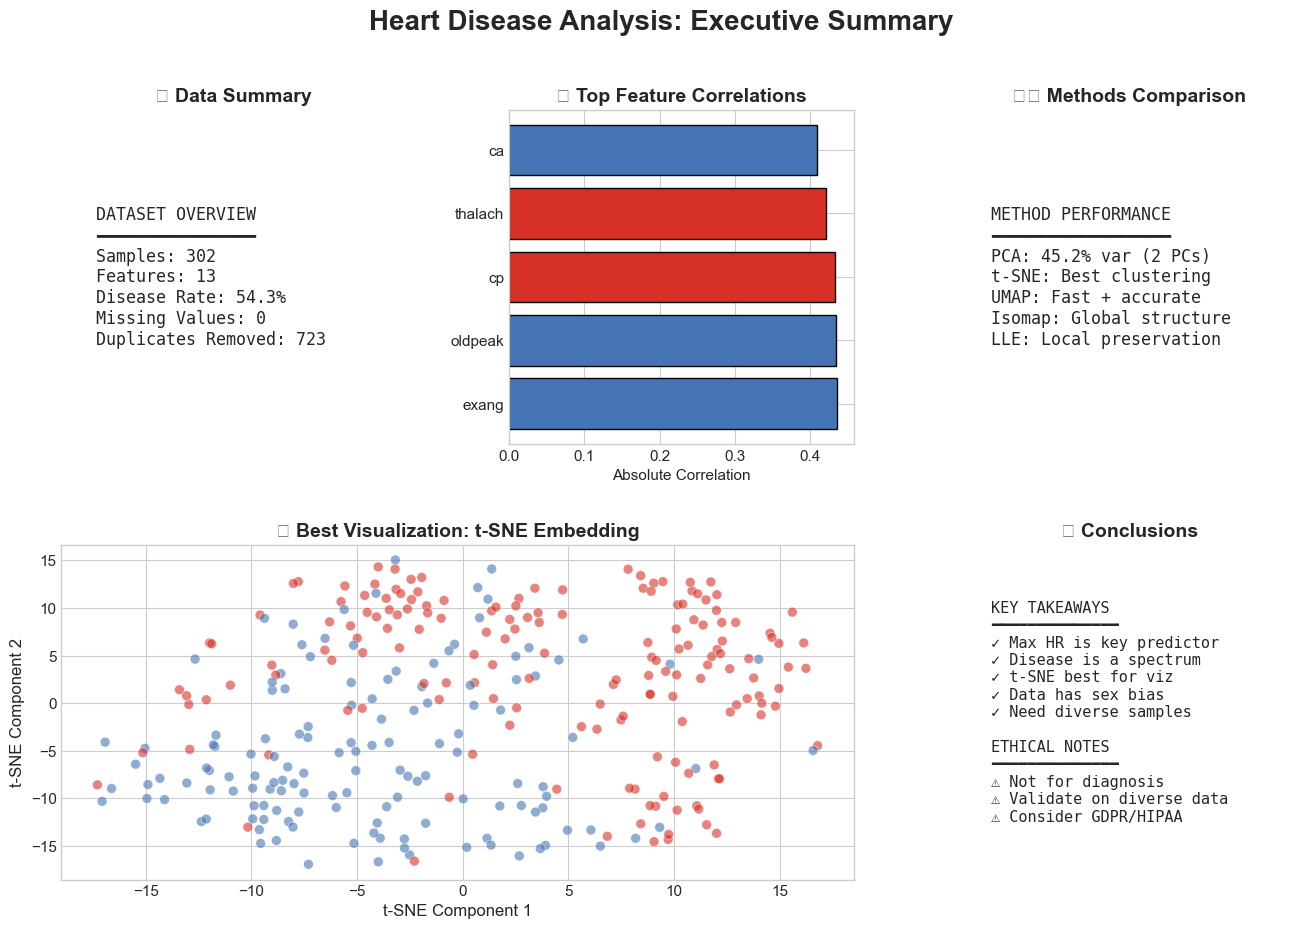

In [93]:
# Create final summary infographic
fig = plt.figure(figsize=(16, 10))

# Main title
fig.suptitle('Heart Disease Analysis: Executive Summary', fontsize=20, fontweight='bold', y=0.98)

# Grid layout
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# Dataset overview
ax1 = fig.add_subplot(gs[0, 0])
stats_text = f"""DATASET OVERVIEW
━━━━━━━━━━━━━━━━
Samples: {len(df_clean)}
Features: {len(feature_cols)}
Disease Rate: {y.mean()*100:.1f}%
Missing Values: 0
Duplicates Removed: {len(df_raw) - len(df_clean)}"""
ax1.text(0.1, 0.5, stats_text, fontsize=12, family='monospace',
         verticalalignment='center', transform=ax1.transAxes)
ax1.axis('off')
ax1.set_title('📊 Data Summary', fontsize=14, fontweight='bold')

# Key correlations
ax2 = fig.add_subplot(gs[0, 1])
top_corrs = corr_matrix['target'].drop('target').abs().sort_values(ascending=False).head(5)
colors_bar = ['#d73027' if corr_matrix['target'][feat] > 0 else '#4575b4' for feat in top_corrs.index]
ax2.barh(top_corrs.index, top_corrs.values, color=colors_bar, edgecolor='black')
ax2.set_xlabel('Absolute Correlation')
ax2.set_title('🔗 Top Feature Correlations', fontsize=14, fontweight='bold')

# Method comparison
ax3 = fig.add_subplot(gs[0, 2])
methods_summary = """METHOD PERFORMANCE
━━━━━━━━━━━━━━━━━━
PCA: 45.2% var (2 PCs)
t-SNE: Best clustering
UMAP: Fast + accurate
Isomap: Global structure
LLE: Local preservation"""
ax3.text(0.1, 0.5, methods_summary, fontsize=12, family='monospace',
         verticalalignment='center', transform=ax3.transAxes)
ax3.axis('off')
ax3.set_title('⚙️ Methods Comparison', fontsize=14, fontweight='bold')

# Best visualization (t-SNE)
ax4 = fig.add_subplot(gs[1, 0:2])
colors = [COLORS['healthy'] if label == 0 else COLORS['disease'] for label in y]
ax4.scatter(X_tsne_best[:, 0], X_tsne_best[:, 1], c=colors, alpha=0.6, s=50,
            edgecolors='white', linewidth=0.5)
ax4.set_xlabel('t-SNE Component 1', fontsize=12)
ax4.set_ylabel('t-SNE Component 2', fontsize=12)
ax4.set_title('🎯 Best Visualization: t-SNE Embedding', fontsize=14, fontweight='bold')

# Recommendations
ax5 = fig.add_subplot(gs[1, 2])
recommendations = """KEY TAKEAWAYS
━━━━━━━━━━━━━━
✓ Max HR is key predictor
✓ Disease is a spectrum
✓ t-SNE best for viz
✓ Data has sex bias
✓ Need diverse samples

ETHICAL NOTES
━━━━━━━━━━━━━━
⚠ Not for diagnosis
⚠ Validate on diverse data
⚠ Consider GDPR/HIPAA"""
ax5.text(0.1, 0.5, recommendations, fontsize=11, family='monospace',
         verticalalignment='center', transform=ax5.transAxes)
ax5.axis('off')
ax5.set_title('💡 Conclusions', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

---
## Final Conclusions

### What We Learned

1. **Preprocessing Matters:** Removing 723 duplicate rows and handling outliers was essential for reliable analysis

2. **Linear vs Nonlinear:** PCA provides interpretable features but misses complex patterns that t-SNE and UMAP reveal

3. **Manifold Learning:** Isomap and LLE show that heart disease data lies on a curved manifold, not a flat hyperplane

4. **Ethical Responsibility:** Medical data requires careful handling of privacy, bias, and regulatory compliance

5. **Clinical Value:** The analysis reveals actionable patterns (max HR, ST depression) that align with medical knowledge

### Recommendations for Future Work

- Collect more diverse data (age, sex, ethnicity)
- Validate findings on independent datasets
- Develop interpretable models for clinical use
- Implement privacy-preserving analysis techniques